###Data Agregation

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('drive')

ad_df = pd.read_csv('drive/MyDrive/DATA/Adelaide_Data.csv')
pe_df = pd.read_csv('drive/MyDrive/DATA/Perth_Data.csv')
sy_df = pd.read_csv('drive/MyDrive/DATA/Sydney_Data.csv')
ta_df = pd.read_csv('drive/MyDrive/DATA/Tasmania_Data.csv')


ad_df, ad_test = train_test_split(ad_df, test_size=0.15, random_state=42)
pe_df, pe_test = train_test_split(pe_df, test_size=0.15, random_state=42)
sy_df, sy_test = train_test_split(sy_df, test_size=0.15, random_state=42)
ta_df, ta_test = train_test_split(ta_df, test_size=0.15, random_state=42)
print("AD")
print(ad_df.head)
print("PE")
print(pe_df.head)
print("SY")
print(sy_df.head)
print("TA")
print(ta_df.head)

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).
AD
<bound method NDFrame.head of        316.5855  223.9277  182.3434  551.5497    7.8641  243.1339  361.0877  \
49100  163.5859  466.9102   30.0314    3.6510  261.6792  533.6132   85.1772   
811    325.9077  190.7717  133.6367   75.9563  544.6629  180.7931   77.3838   
53542  278.1678  281.4901  414.6443  260.2547  170.7852  482.8654  114.6404   
4289   257.7369  430.6933  455.4716   33.8583  198.6847  163.2856  379.0076   
46919   62.2325  299.8864  450.6589    0.0000  296.9277   78.0848  410.7207   
...         ...       ...       ...       ...       ...       ...       ...   
37194  126.1460  356.3133  162.5591    0.0000  129.0700  466.3979  116.7792   
6265   404.9498  420.6272  462.3520  490.4640   67.1457  275.8510  293.9063   
54886   34.8396  455.3952  119.4908  253.9066  486.6172  319.3480    0.0000   
860    173.6214  521.0929  506.2402  141.0739  171.1554  147.6977 

###Info about data

In [ ]:
ad_df.info()
pe_df.info()
sy_df.info()
ta_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 61198 entries, 49100 to 15795
Data columns (total 49 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   316.5855     61198 non-null  float64
 1   223.9277     61198 non-null  float64
 2   182.3434     61198 non-null  float64
 3   551.5497     61198 non-null  float64
 4   7.8641       61198 non-null  float64
 5   243.1339     61198 non-null  float64
 6   361.0877     61198 non-null  float64
 7   115.9284     61198 non-null  float64
 8   78.6087      61198 non-null  float64
 9   468.3799     61198 non-null  float64
 10  362.6036     61198 non-null  float64
 11  1.6865       61198 non-null  float64
 12  508.6837     61198 non-null  float64
 13  446.644      61198 non-null  float64
 14  385.7292     61198 non-null  float64
 15  522.1661     61198 non-null  float64
 16  180.9224     61198 non-null  float64
 17  366.9186     61198 non-null  float64
 18  200.9217     61198 non-null  float64
 19  

###Giving Columns their names

In [ ]:
names = ['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15','X16',
                 'Y1','Y2','Y3','Y4','Y5','Y6','Y7','Y8','Y9','Y10','Y11','Y12','Y13','Y14','Y15','Y16',
                 'P1','P2','P3','P4','P5','P6','P7','P8','P9','P10','P11','P12','P13','P14','P15','P16',
                 'Powerall']
ad_df.columns = names
pe_df.columns = names
sy_df.columns = names
ta_df.columns = names


###Plotting Histograms

array([[<Axes: title={'center': 'X1'}>, <Axes: title={'center': 'X2'}>,
        <Axes: title={'center': 'X3'}>, <Axes: title={'center': 'X4'}>,
        <Axes: title={'center': 'X5'}>, <Axes: title={'center': 'X6'}>,
        <Axes: title={'center': 'X7'}>],
       [<Axes: title={'center': 'X8'}>, <Axes: title={'center': 'X9'}>,
        <Axes: title={'center': 'X10'}>, <Axes: title={'center': 'X11'}>,
        <Axes: title={'center': 'X12'}>, <Axes: title={'center': 'X13'}>,
        <Axes: title={'center': 'X14'}>],
       [<Axes: title={'center': 'X15'}>, <Axes: title={'center': 'X16'}>,
        <Axes: title={'center': 'Y1'}>, <Axes: title={'center': 'Y2'}>,
        <Axes: title={'center': 'Y3'}>, <Axes: title={'center': 'Y4'}>,
        <Axes: title={'center': 'Y5'}>],
       [<Axes: title={'center': 'Y6'}>, <Axes: title={'center': 'Y7'}>,
        <Axes: title={'center': 'Y8'}>, <Axes: title={'center': 'Y9'}>,
        <Axes: title={'center': 'Y10'}>, <Axes: title={'center': 'Y11'}>,
    

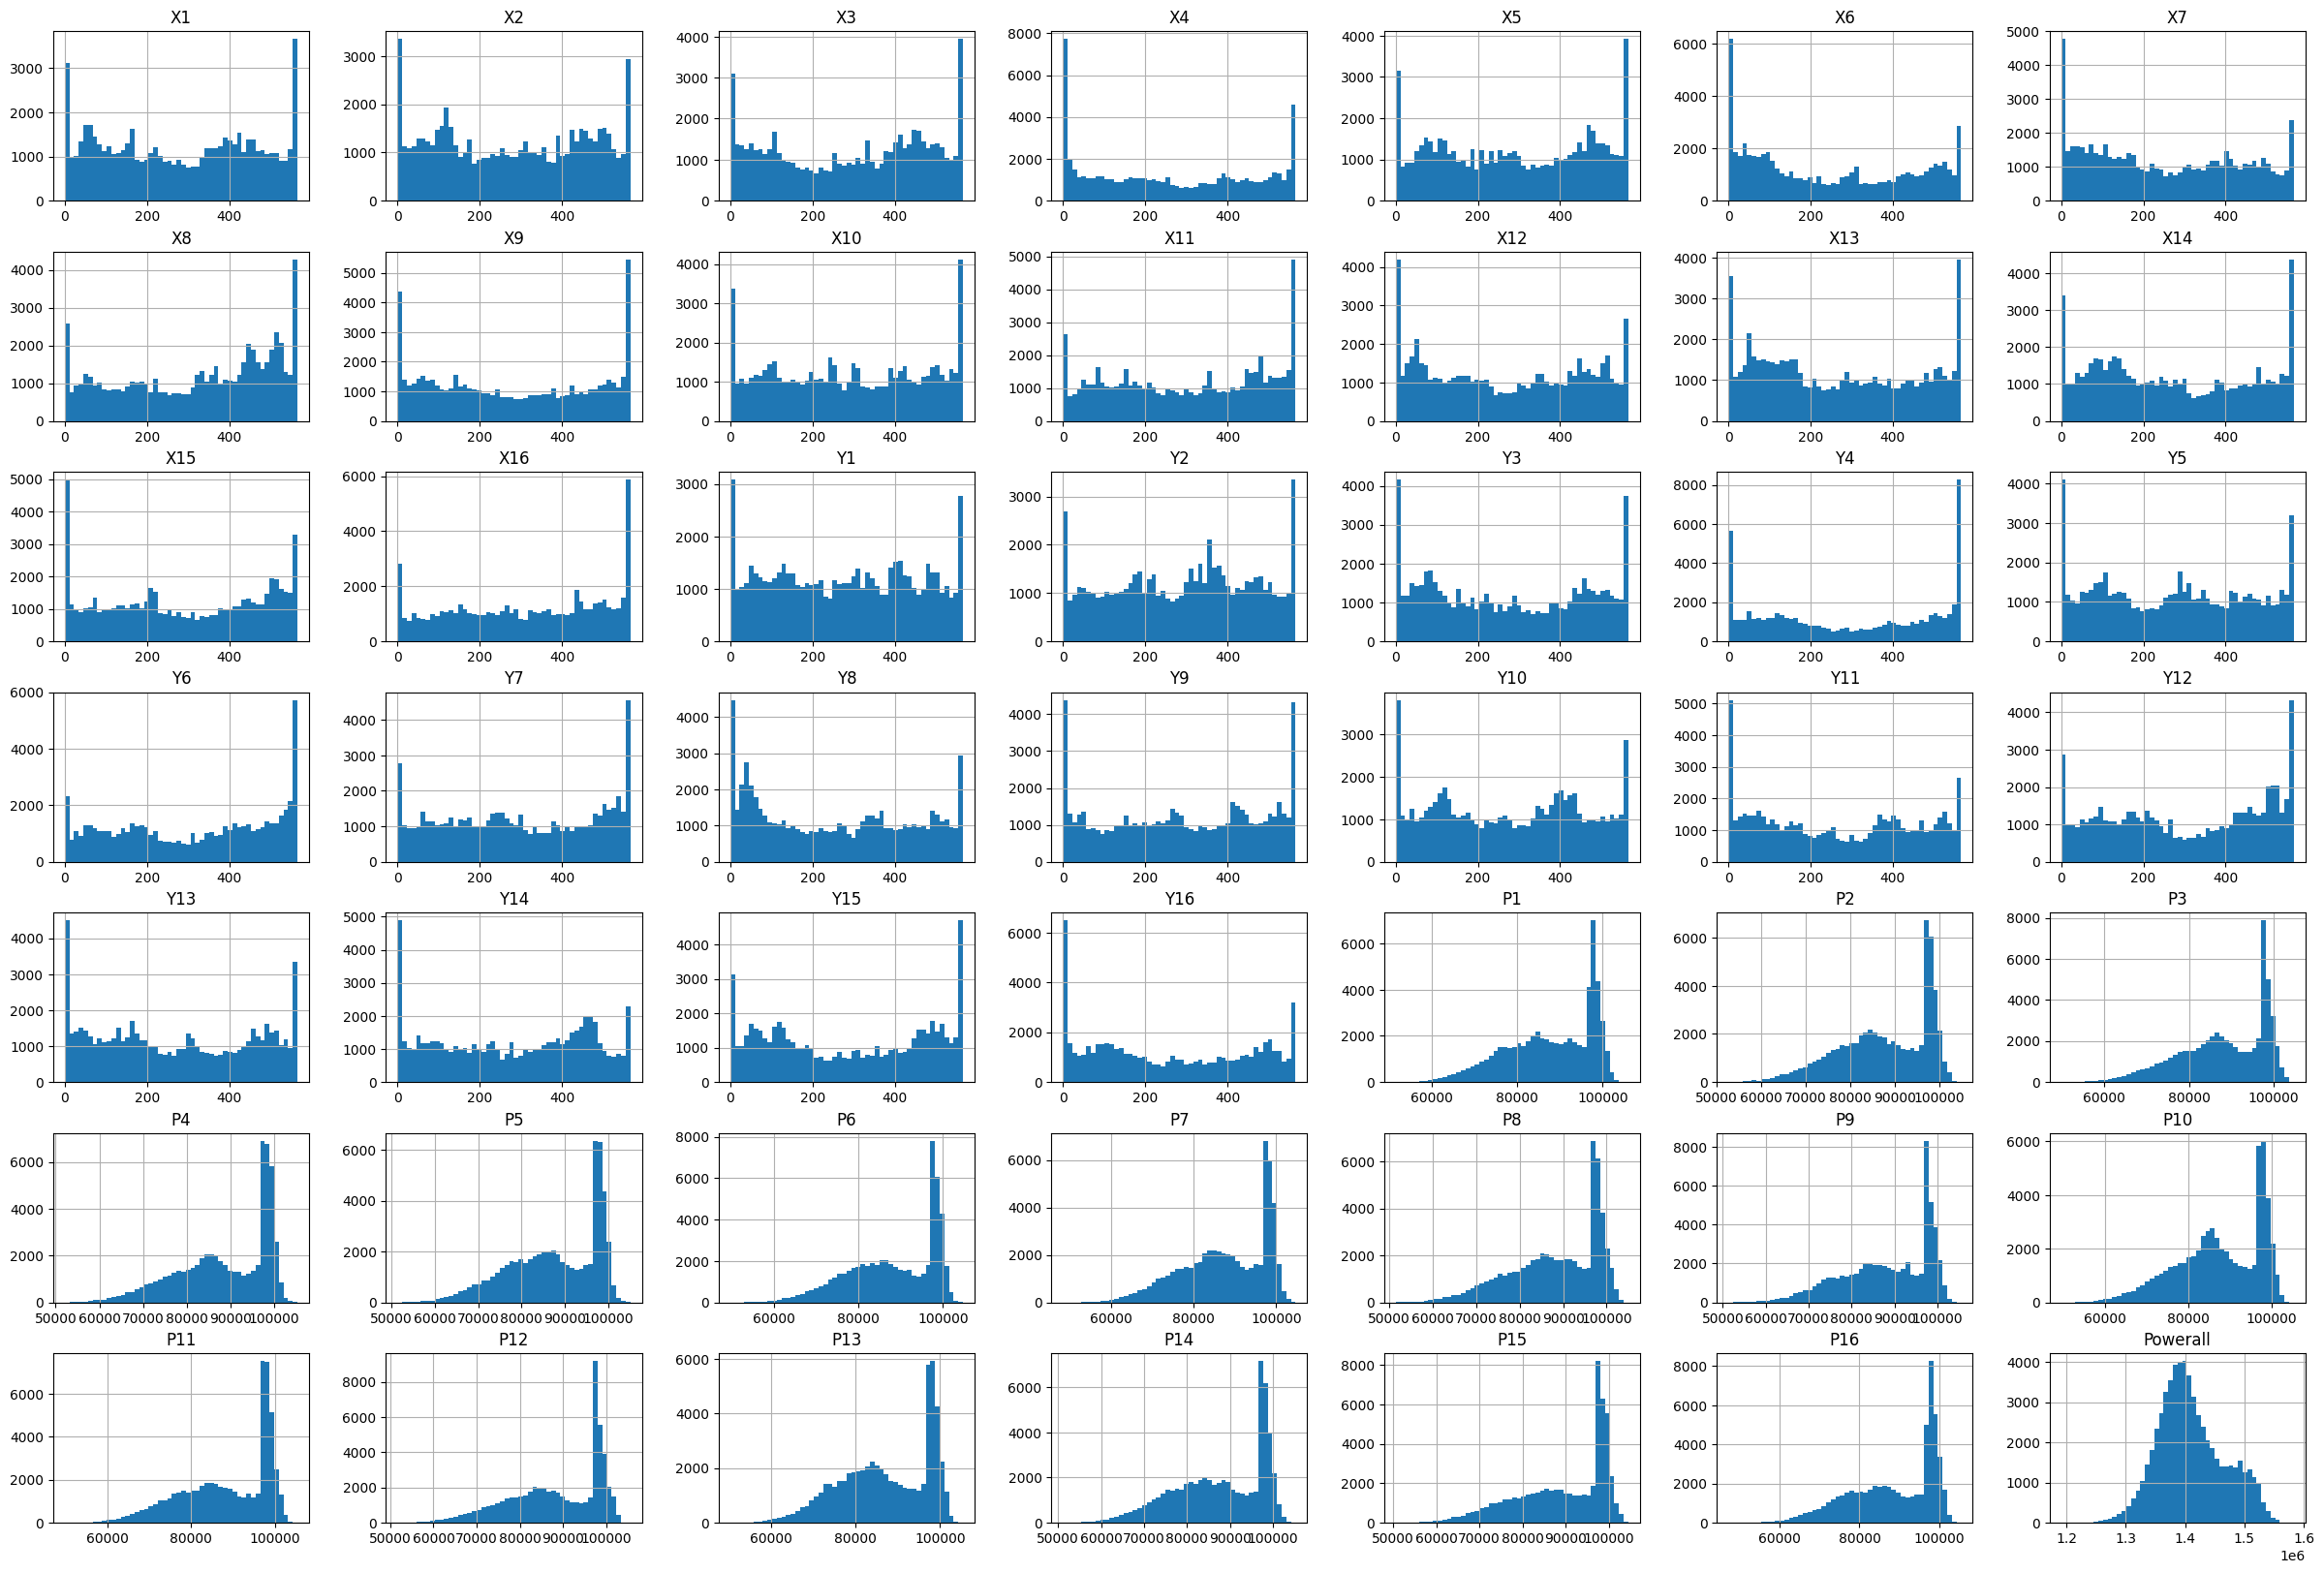

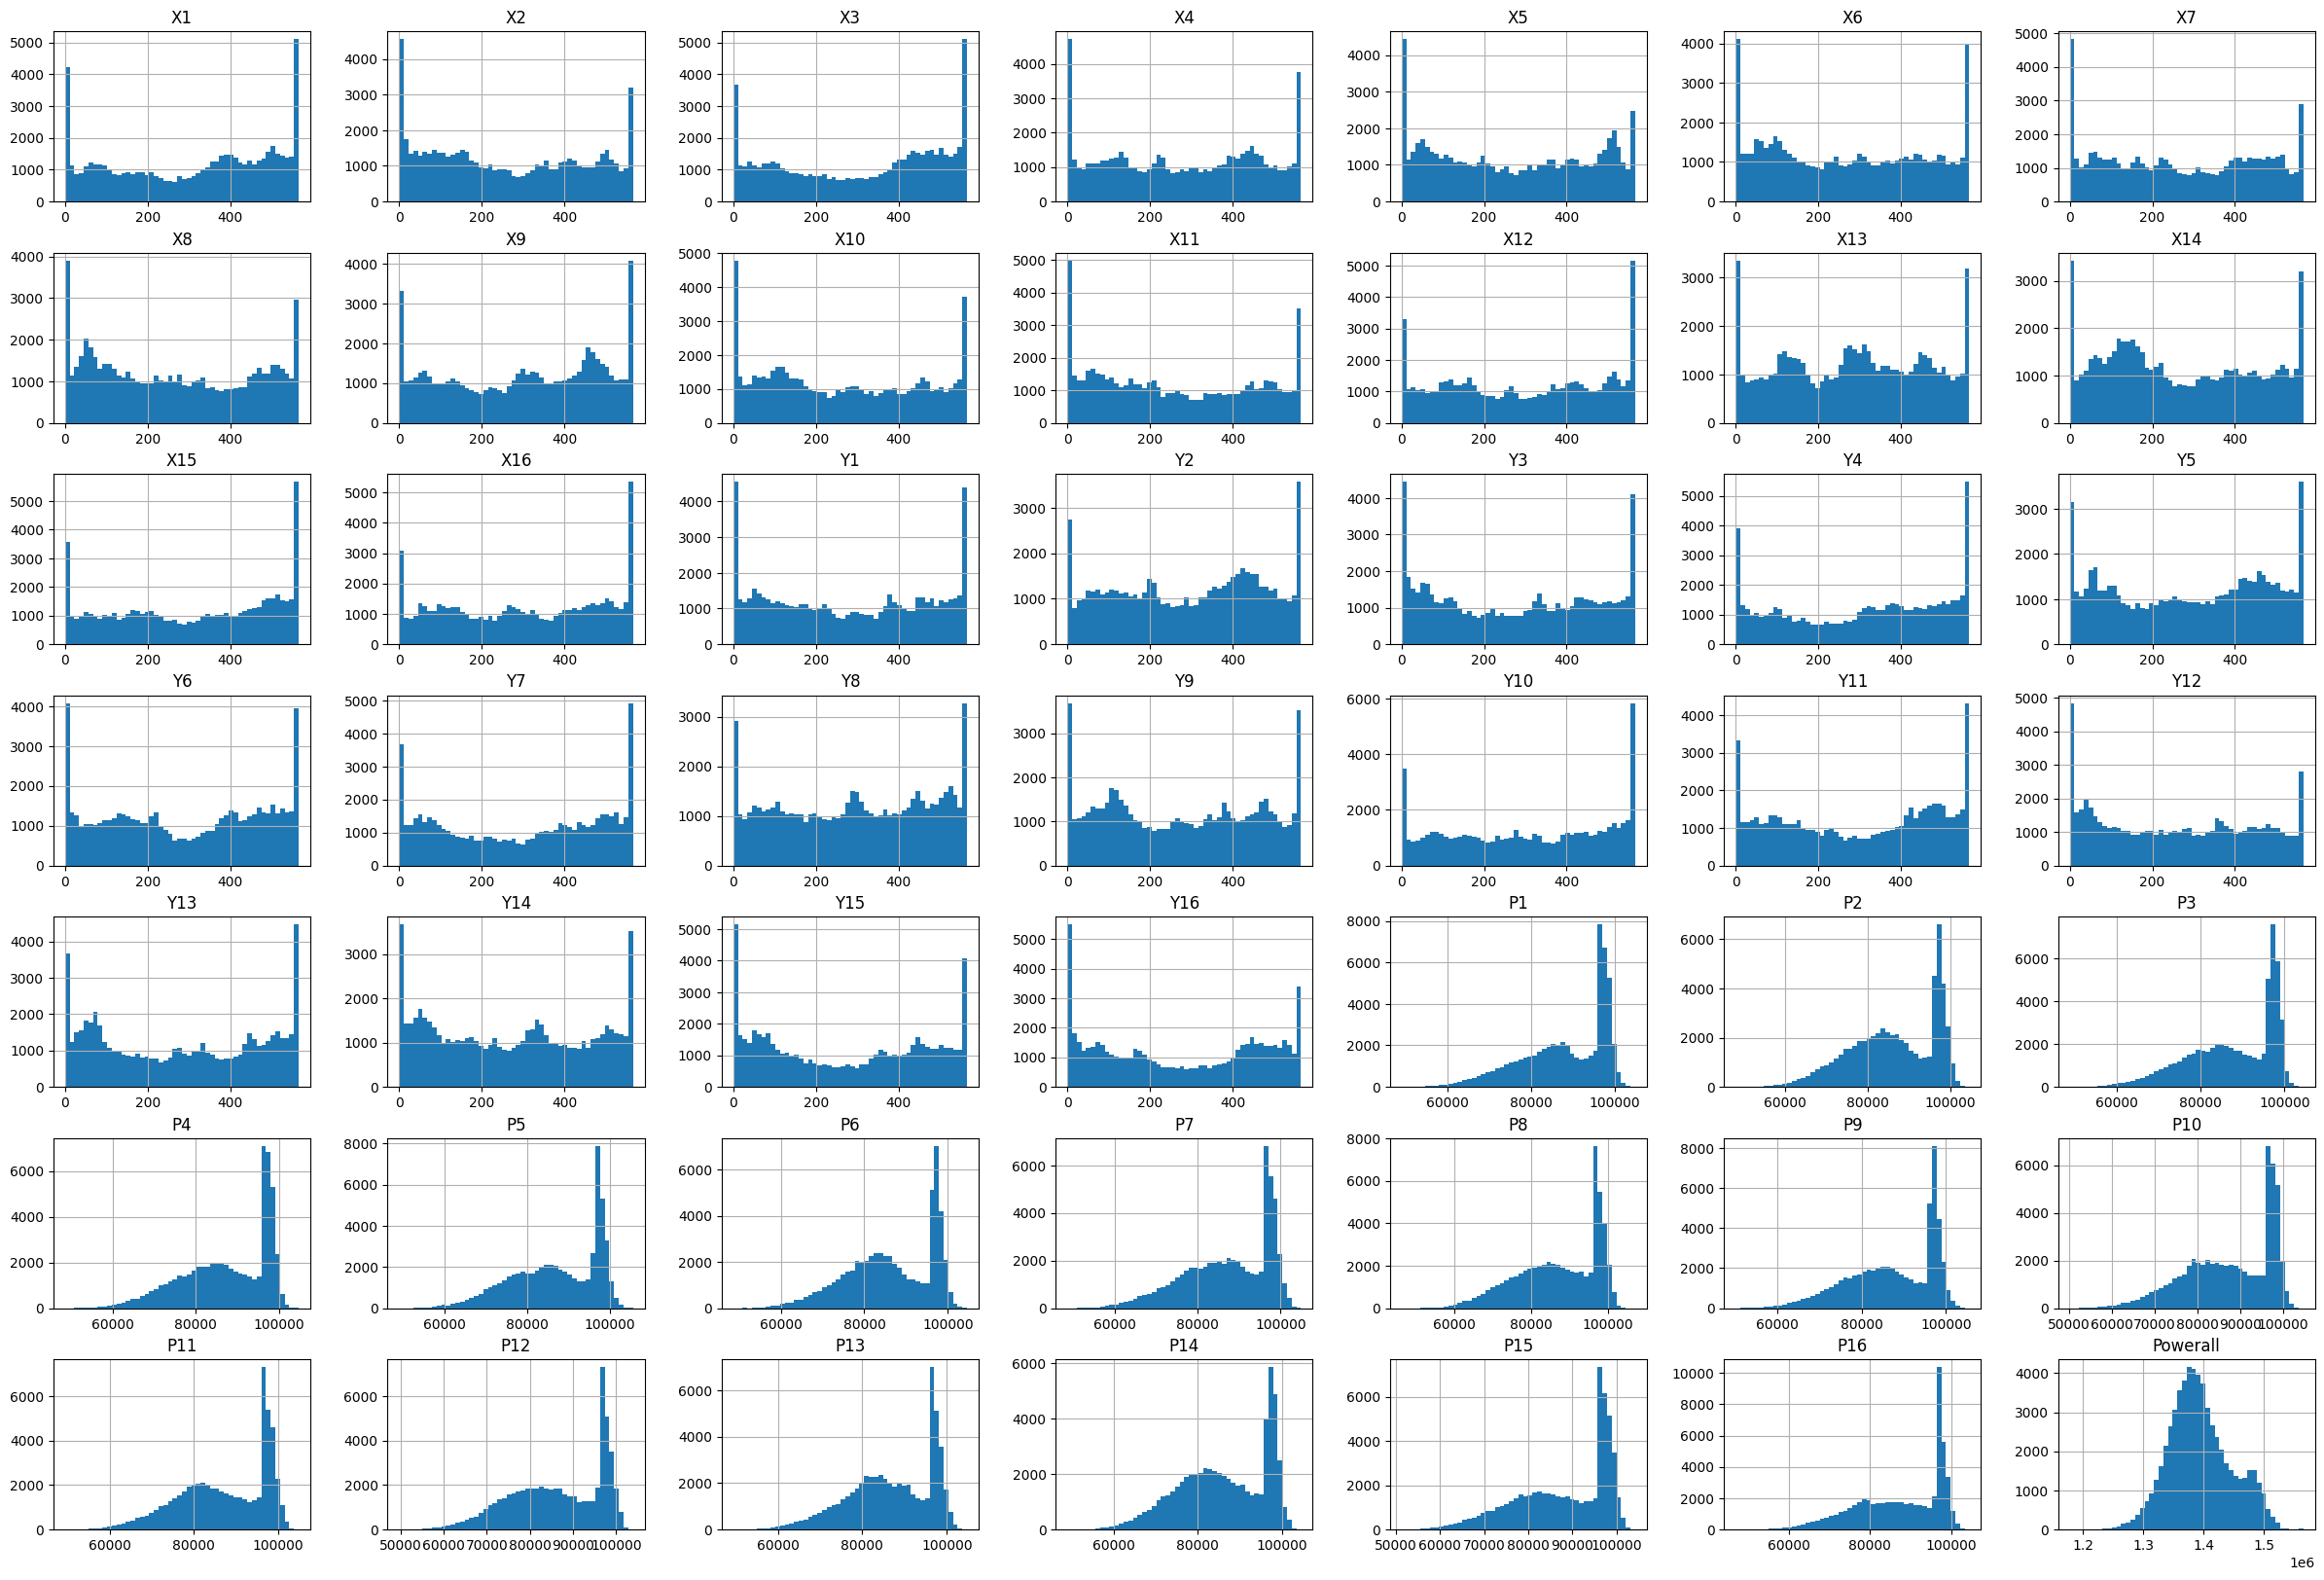

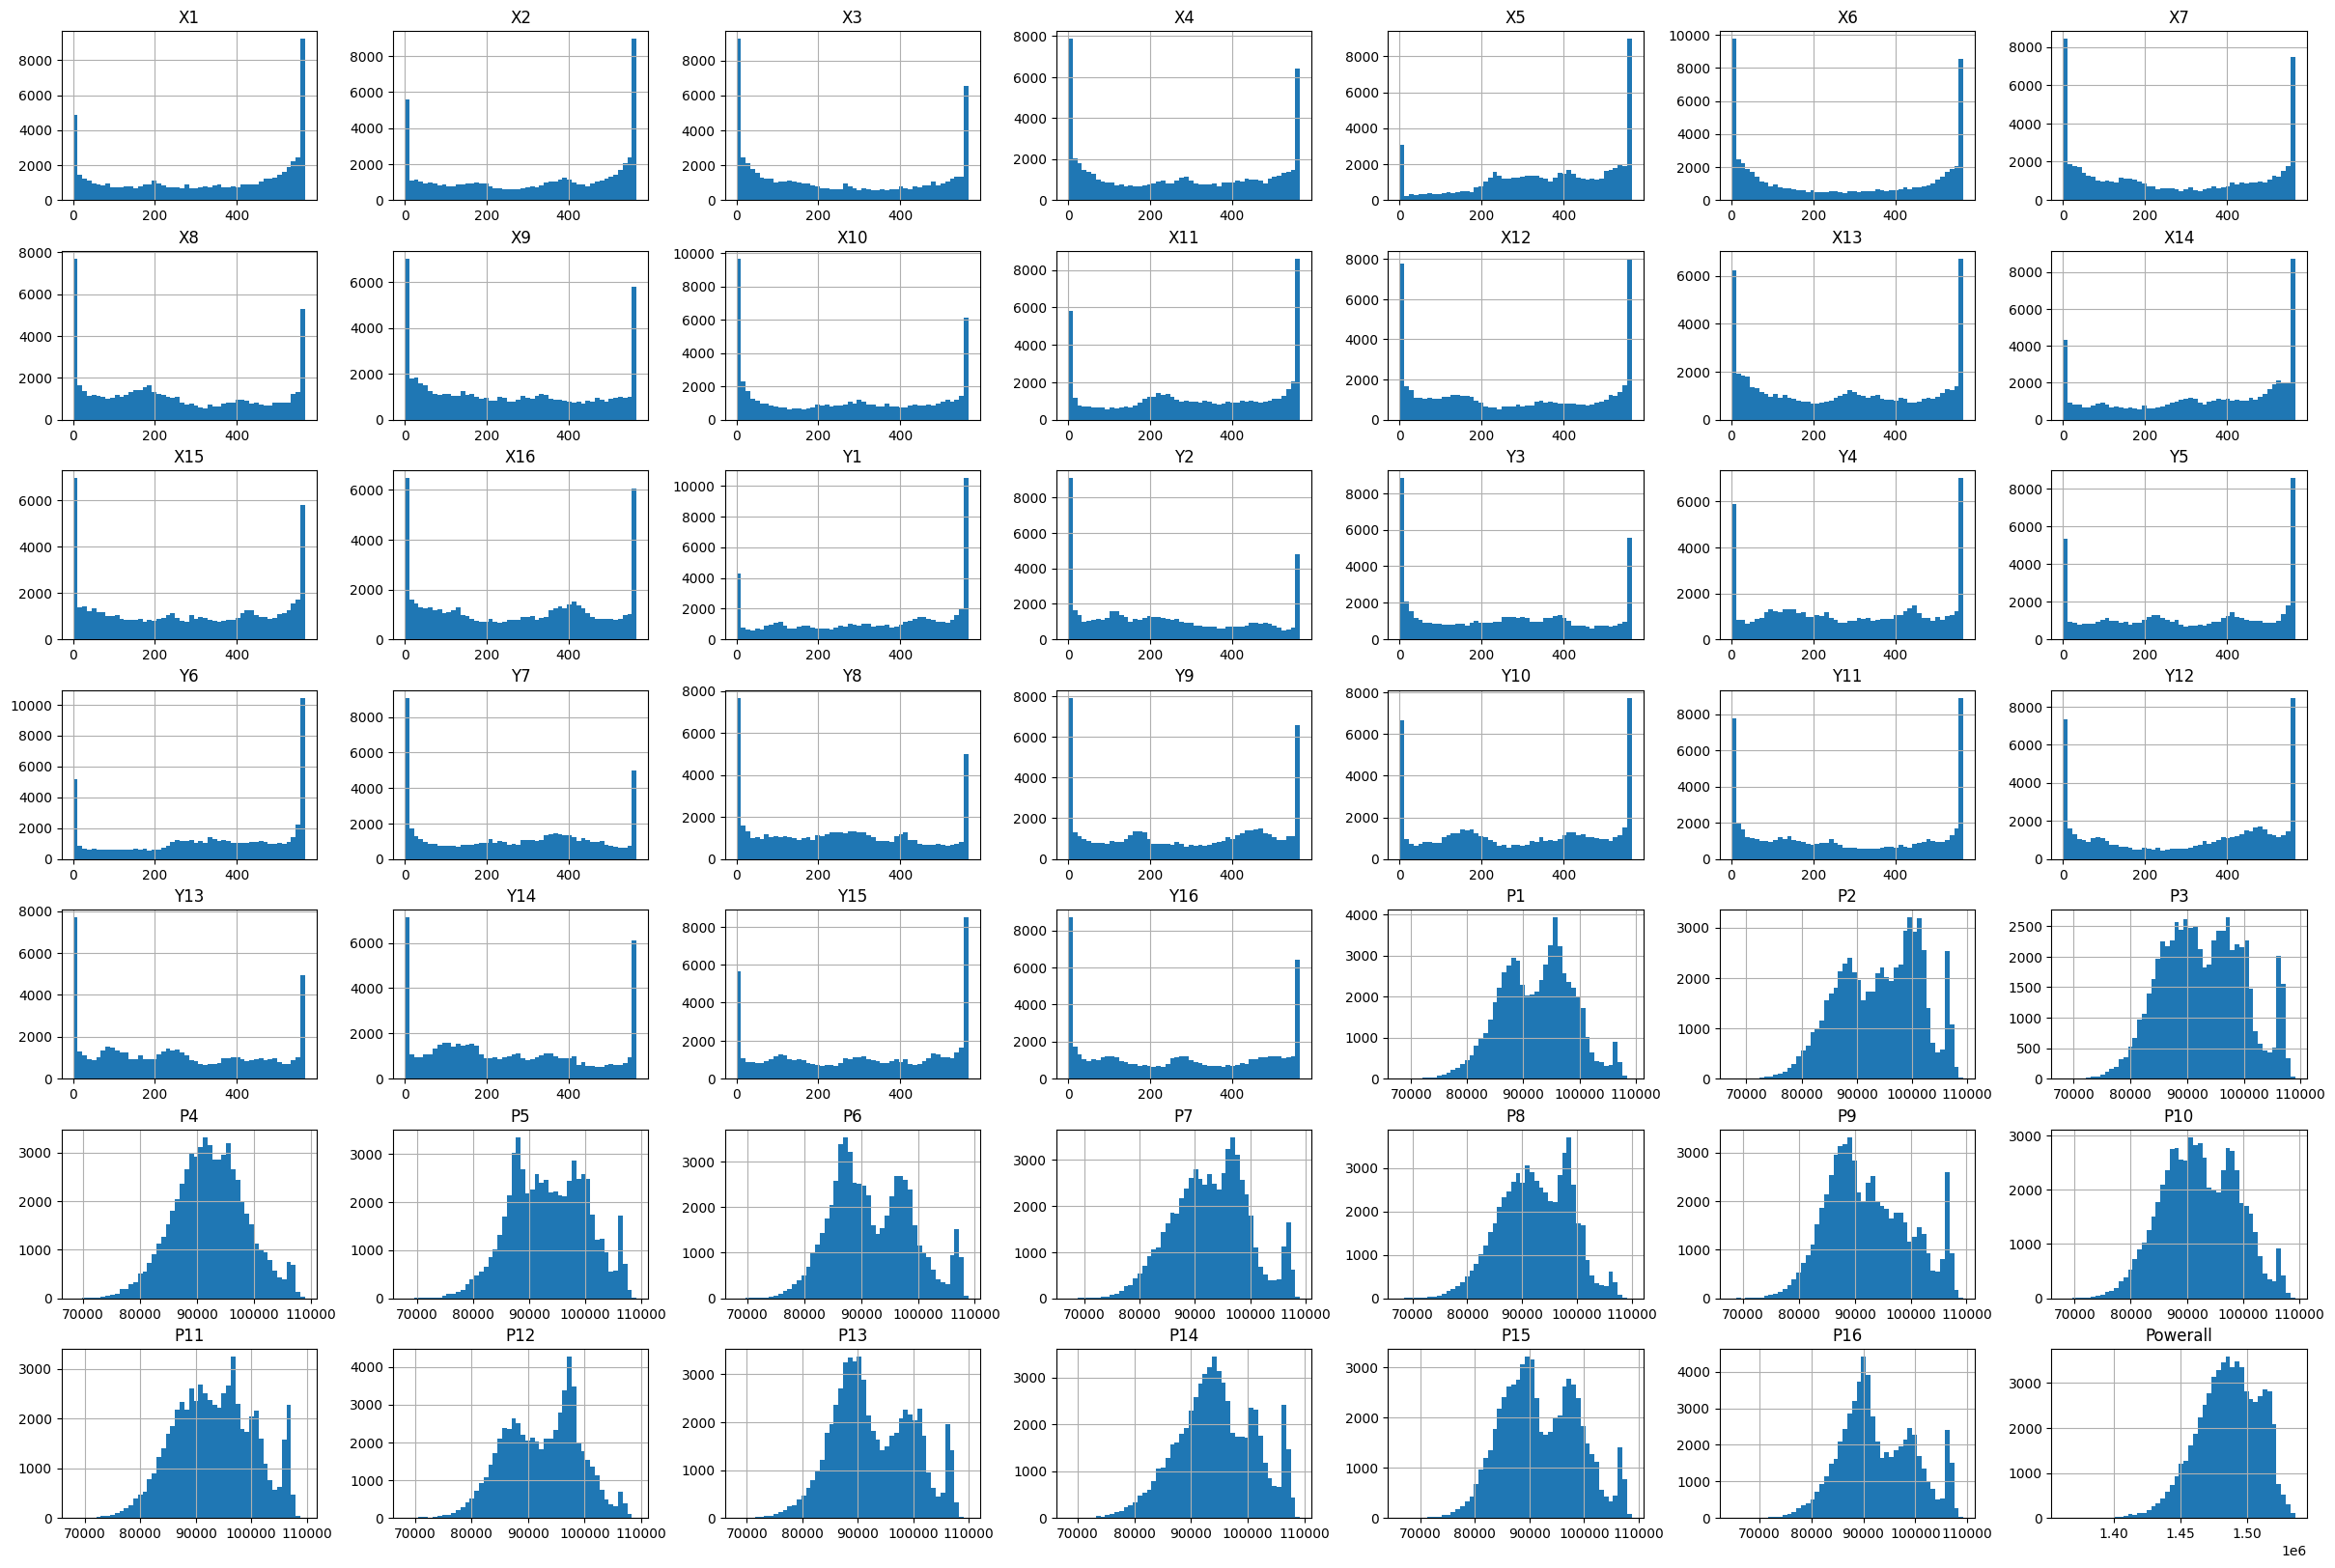

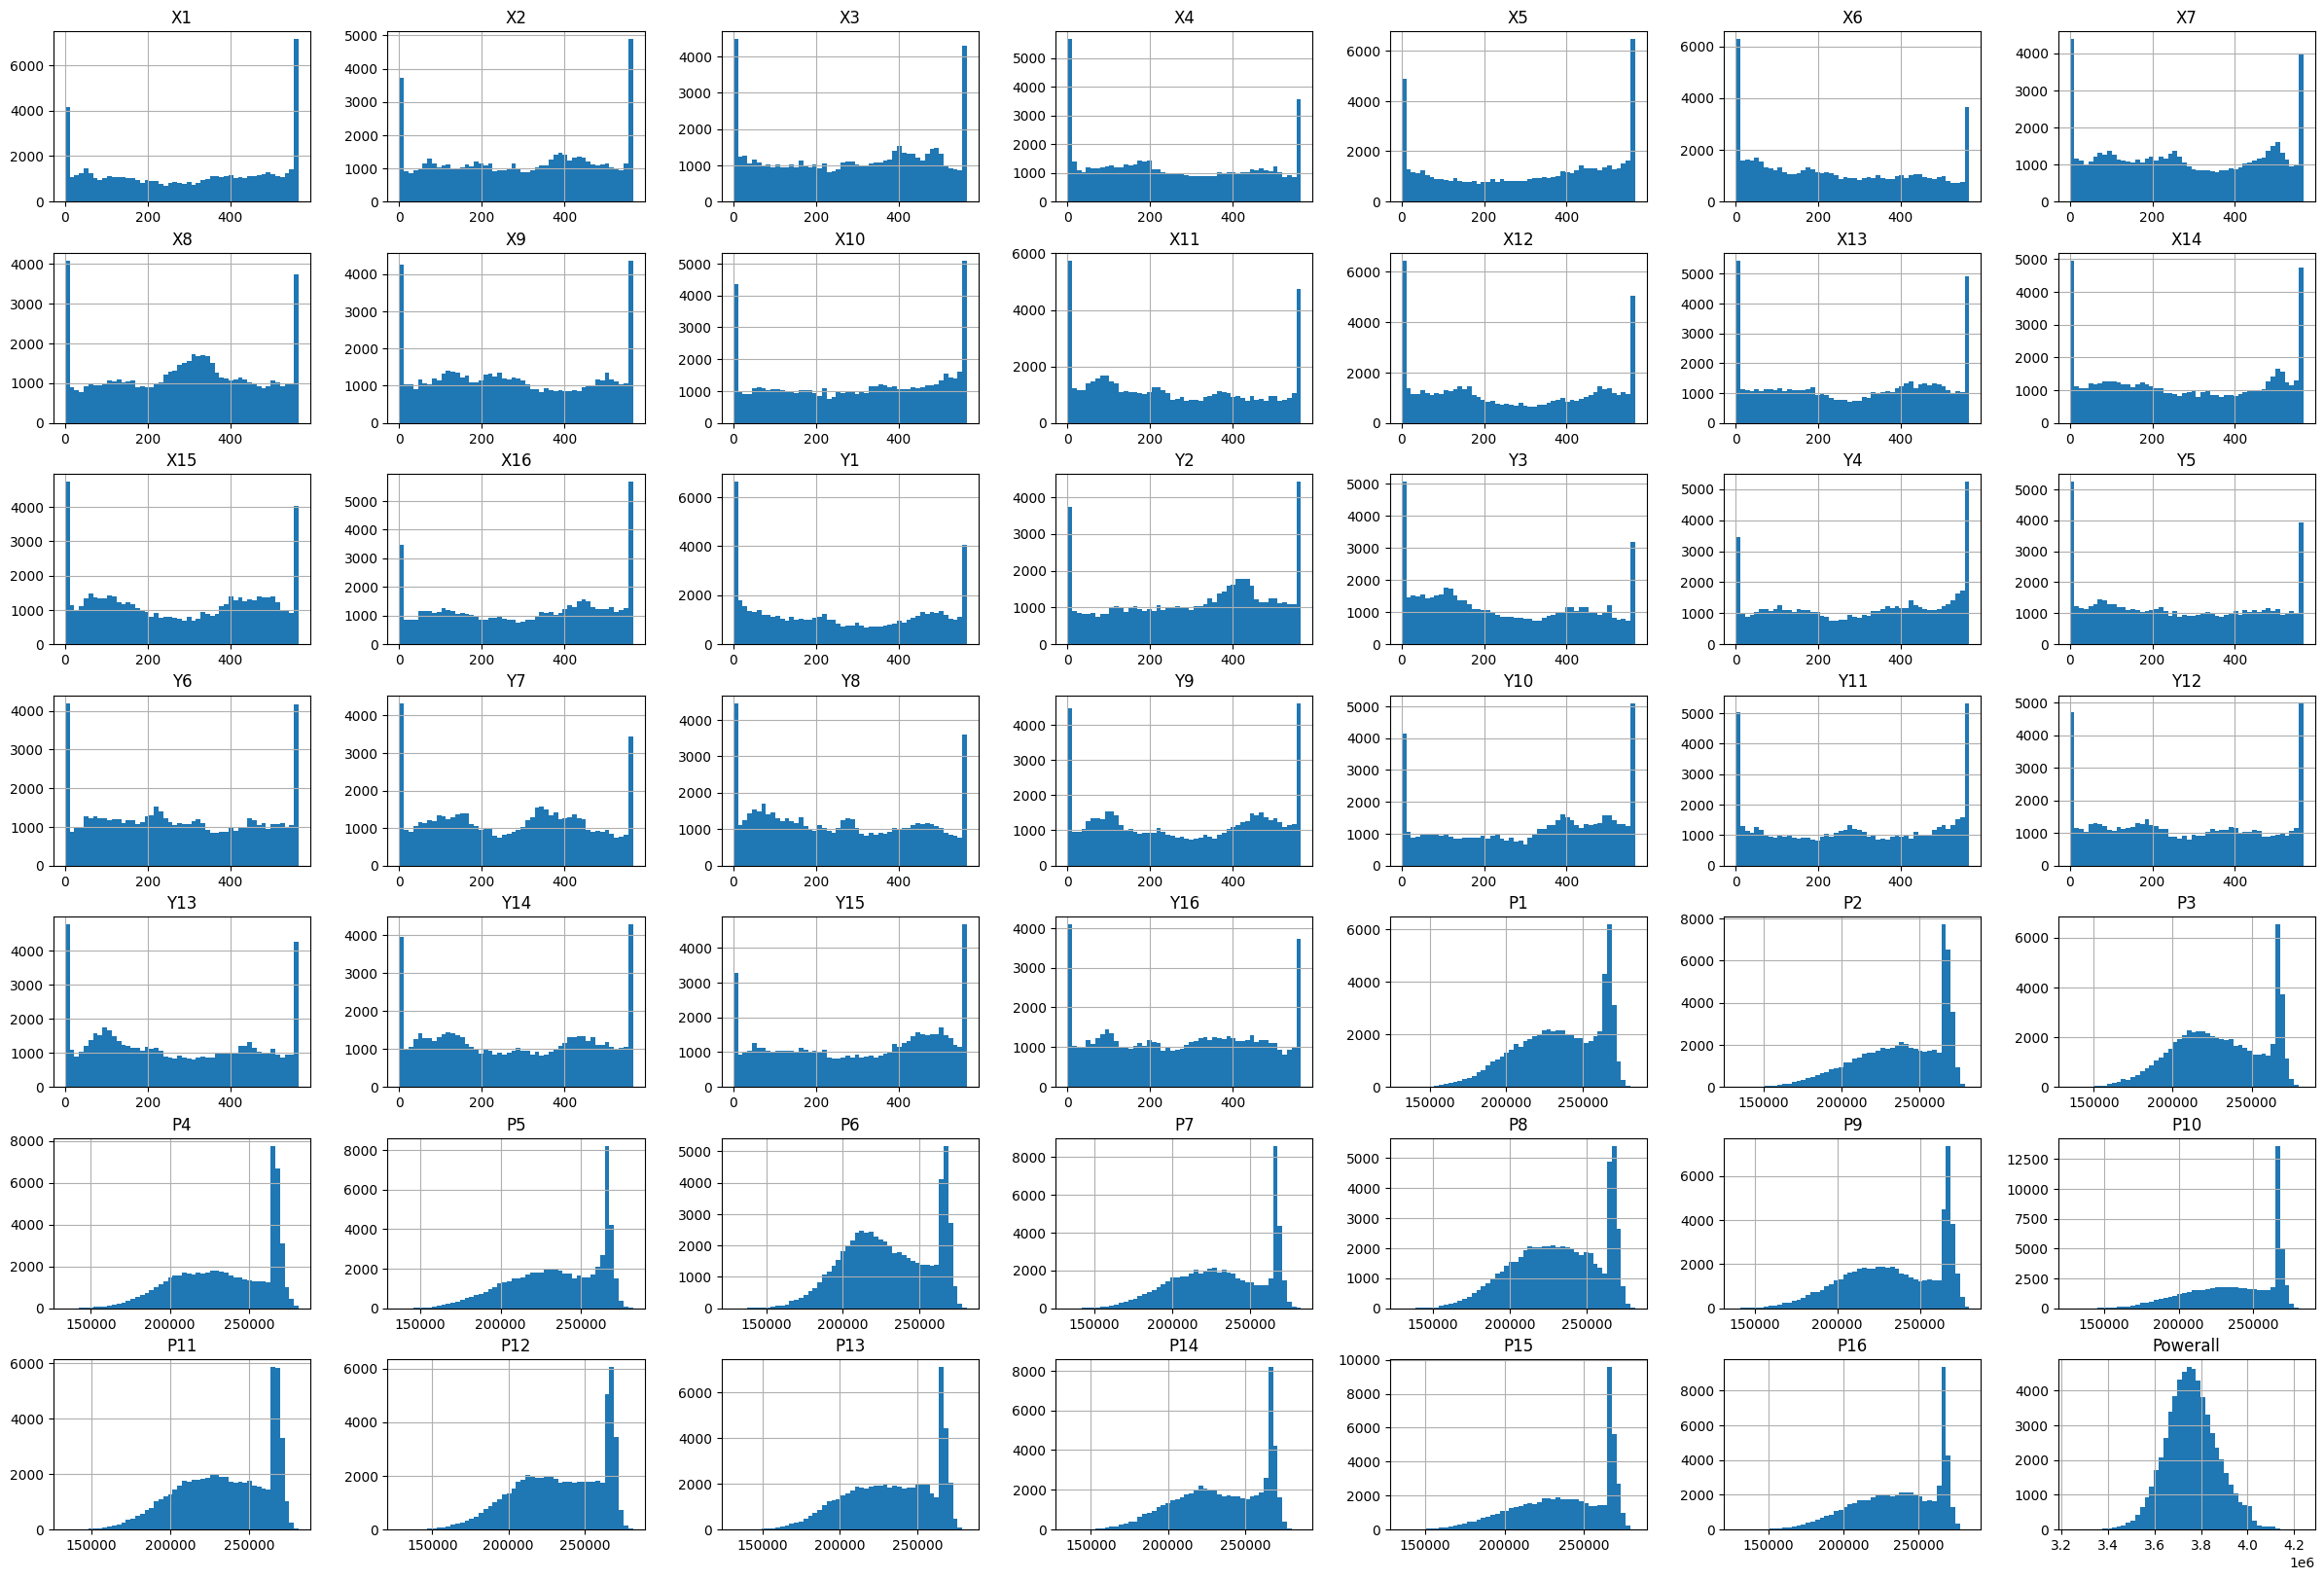

In [ ]:
ad_df.hist(bins = 50, figsize=(30,20))
pe_df.hist(bins = 50, figsize=(30,20))
sy_df.hist(bins = 50, figsize=(30,20))
ta_df.hist(bins = 50, figsize=(30,20))

### Dropping mismatches

In [ ]:
ad_df['calculated_power_sum'] = ad_df[[f'P{i}' for i in range(1, 17)]].sum(axis=1)

tolerance = 0.1
ad_df['power_mismatch'] = abs(ad_df['calculated_power_sum'] - ad_df['Powerall']) > tolerance
ad_df = ad_df[~ad_df['power_mismatch']]

print("Liczba odrzuconych wierszy:", ad_df['power_mismatch'].sum())


Liczba odrzuconych wierszy: 0


###Concatenaiting Different cities dataframes and one hot encoding cities names

In [ ]:
from sklearn.utils import shuffle
pd.set_option('display.max_columns', None)
ad_df['city'] = 'Adelaide'
pe_df['city'] = 'Perth'
sy_df['city'] = 'Sydney'
ta_df['city'] = 'Tasmania'
frames = [ad_df, pe_df, sy_df ] # ta_df
df = pd.concat(frames)
df = pd.get_dummies(df, columns=['city'])
df = shuffle(df)
df.reset_index(drop=True, inplace=True)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Y10,Y11,Y12,Y13,Y14,Y15,Y16,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,Powerall,calculated_power_sum,power_mismatch,city_Adelaide,city_Perth,city_Sydney
0,29.4851,544.3150,8.1956,10.2046,244.6323,0.0000,566.0000,566.0000,278.4765,0.0000,552.7671,177.6200,566.0000,304.8810,451.1763,352.2578,450.7815,201.1937,8.7026,141.4918,552.1232,558.4918,0.0000,407.1655,139.5905,330.0927,566.0000,15.1594,86.2721,354.5798,563.0016,0.0000,87561.3818,99147.7689,94771.6923,91645.0641,88510.4744,88359.2355,106958.2107,99002.5761,92095.0784,90952.3699,96802.8267,96747.8352,101557.4231,95327.0924,89389.4928,100608.2995,1519436.822,NaN,NaN,0,0,1
1,384.5479,566.0000,84.9128,443.6508,171.2897,44.3390,566.0000,112.5243,362.4722,121.9734,384.7759,184.5697,566.0000,232.9951,0.0000,508.4813,218.5123,444.1514,137.2407,72.1379,330.4180,259.6255,0.0000,566.0000,511.9808,290.1473,368.1012,453.3265,73.1505,566.0000,432.9898,430.2571,101220.6191,96488.8925,98440.1397,95014.8861,86324.4755,87729.4417,106909.7642,81148.0518,87821.0736,87149.5687,94873.8743,84592.8560,101911.3542,84642.4144,83377.5749,89167.1393,1466812.126,NaN,NaN,0,0,1
2,379.2030,119.5330,204.7531,522.3259,472.4612,0.0000,141.3940,217.6254,419.3337,566.0000,84.8454,234.2084,53.8108,537.7407,563.2476,283.5006,296.9371,352.6218,566.0000,47.1559,109.1286,549.7850,214.2053,496.3247,261.1647,390.7409,404.8588,356.5644,494.8725,245.2630,3.6139,338.0203,93666.9425,84240.8681,97421.4633,100883.9647,88297.4342,99298.2242,75955.8605,93379.3681,91237.2716,97419.0767,85305.8110,95748.5577,92109.2728,92545.5671,100225.7967,101649.7530,1489385.232,1.489385e+06,False,1,0,0
3,280.8962,296.4784,544.7493,154.6329,461.8481,70.8334,434.4109,323.9100,277.5197,14.3864,538.0570,169.7056,88.7228,312.2804,385.5788,267.2862,106.3944,194.4648,168.7344,254.3778,252.0939,528.0618,188.4462,11.3952,518.1514,457.1035,10.2275,521.9411,281.5976,441.8345,351.4053,239.7814,70933.2561,84168.9864,97935.3871,83726.0606,98192.7026,96256.6087,86244.7368,81878.7583,97383.4382,80640.7949,96830.5059,96531.3099,82478.6152,99241.7383,98140.9233,87138.5322,1437722.355,1.437722e+06,False,1,0,0
4,52.7641,375.9205,357.5931,566.0000,451.7230,372.2753,0.0000,61.5087,133.2553,274.4617,463.0981,222.9321,245.0376,122.7249,537.5389,135.8988,418.8229,442.0691,40.3836,12.0432,291.9474,186.3975,542.6955,536.1171,440.4893,311.7597,163.5609,7.4679,460.2082,348.1620,84.5733,187.7363,81941.1557,96756.7011,78469.4239,96637.4561,97340.4865,89672.1354,93427.8108,97459.2097,95762.4968,89783.8205,94628.4594,74972.4913,99273.3384,80242.4385,98502.7537,78843.3949,1443713.573,NaN,NaN,0,1,0


###Calculating PCA()

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA

transformed_df = pd.DataFrame()
city_columns = [col for col in df.columns if col.startswith('city_')]
print(city_columns)
for i in range(1, 17):
    pair_data = df[['X' + str(i), 'Y' + str(i)]]

    pca = PCA(n_components=1)
    pca.fit(pair_data)
    transformed_data = pca.transform(pair_data)

    transformed_df['PC_' + str(i)] = transformed_data[:, 0]

transformed_df = pd.concat([transformed_df, df[city_columns]], axis=1)
df.head()


['city_Adelaide', 'city_Perth', 'city_Sydney']


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Y10,Y11,Y12,Y13,Y14,Y15,Y16,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,Powerall,calculated_power_sum,power_mismatch,city_Adelaide,city_Perth,city_Sydney
0,29.4851,544.3150,8.1956,10.2046,244.6323,0.0000,566.0000,566.0000,278.4765,0.0000,552.7671,177.6200,566.0000,304.8810,451.1763,352.2578,450.7815,201.1937,8.7026,141.4918,552.1232,558.4918,0.0000,407.1655,139.5905,330.0927,566.0000,15.1594,86.2721,354.5798,563.0016,0.0000,87561.3818,99147.7689,94771.6923,91645.0641,88510.4744,88359.2355,106958.2107,99002.5761,92095.0784,90952.3699,96802.8267,96747.8352,101557.4231,95327.0924,89389.4928,100608.2995,1519436.822,NaN,NaN,0,0,1
1,384.5479,566.0000,84.9128,443.6508,171.2897,44.3390,566.0000,112.5243,362.4722,121.9734,384.7759,184.5697,566.0000,232.9951,0.0000,508.4813,218.5123,444.1514,137.2407,72.1379,330.4180,259.6255,0.0000,566.0000,511.9808,290.1473,368.1012,453.3265,73.1505,566.0000,432.9898,430.2571,101220.6191,96488.8925,98440.1397,95014.8861,86324.4755,87729.4417,106909.7642,81148.0518,87821.0736,87149.5687,94873.8743,84592.8560,101911.3542,84642.4144,83377.5749,89167.1393,1466812.126,NaN,NaN,0,0,1
2,379.2030,119.5330,204.7531,522.3259,472.4612,0.0000,141.3940,217.6254,419.3337,566.0000,84.8454,234.2084,53.8108,537.7407,563.2476,283.5006,296.9371,352.6218,566.0000,47.1559,109.1286,549.7850,214.2053,496.3247,261.1647,390.7409,404.8588,356.5644,494.8725,245.2630,3.6139,338.0203,93666.9425,84240.8681,97421.4633,100883.9647,88297.4342,99298.2242,75955.8605,93379.3681,91237.2716,97419.0767,85305.8110,95748.5577,92109.2728,92545.5671,100225.7967,101649.7530,1489385.232,1.489385e+06,False,1,0,0
3,280.8962,296.4784,544.7493,154.6329,461.8481,70.8334,434.4109,323.9100,277.5197,14.3864,538.0570,169.7056,88.7228,312.2804,385.5788,267.2862,106.3944,194.4648,168.7344,254.3778,252.0939,528.0618,188.4462,11.3952,518.1514,457.1035,10.2275,521.9411,281.5976,441.8345,351.4053,239.7814,70933.2561,84168.9864,97935.3871,83726.0606,98192.7026,96256.6087,86244.7368,81878.7583,97383.4382,80640.7949,96830.5059,96531.3099,82478.6152,99241.7383,98140.9233,87138.5322,1437722.355,1.437722e+06,False,1,0,0
4,52.7641,375.9205,357.5931,566.0000,451.7230,372.2753,0.0000,61.5087,133.2553,274.4617,463.0981,222.9321,245.0376,122.7249,537.5389,135.8988,418.8229,442.0691,40.3836,12.0432,291.9474,186.3975,542.6955,536.1171,440.4893,311.7597,163.5609,7.4679,460.2082,348.1620,84.5733,187.7363,81941.1557,96756.7011,78469.4239,96637.4561,97340.4865,89672.1354,93427.8108,97459.2097,95762.4968,89783.8205,94628.4594,74972.4913,99273.3384,80242.4385,98502.7537,78843.3949,1443713.573,NaN,NaN,0,1,0


###Trying out models with basic parameters

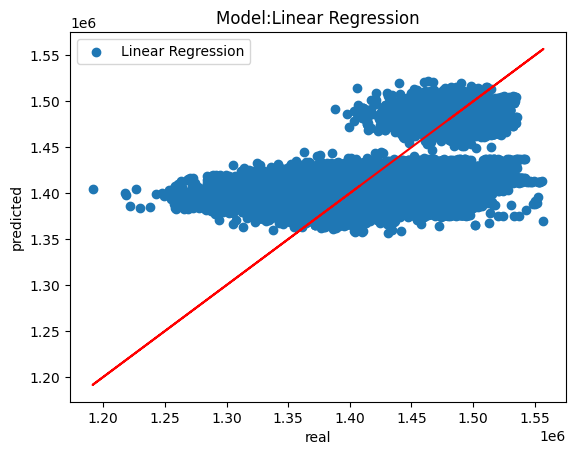

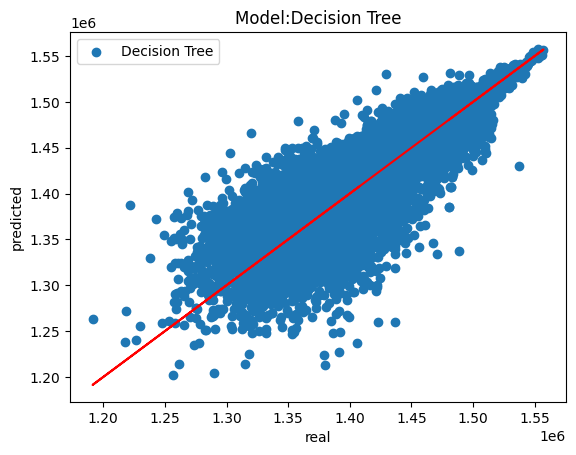

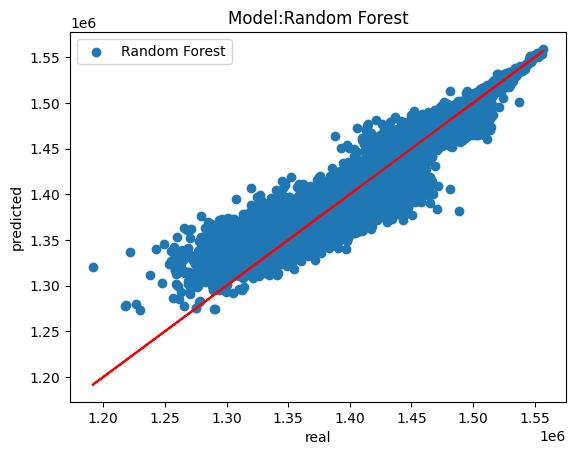

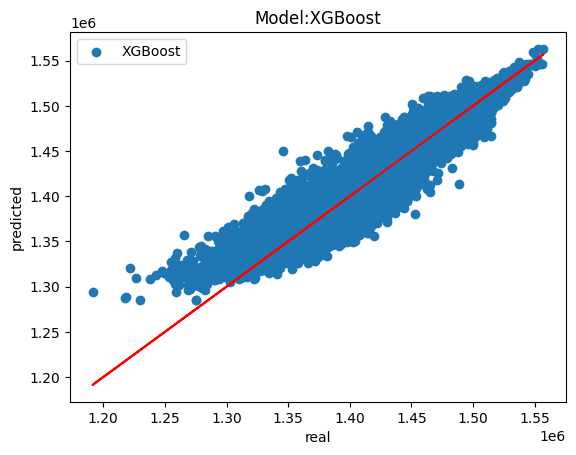

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026623 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4086
[LightGBM] [Info] Number of data points in the train set: 165231, number of used features: 19
[LightGBM] [Info] Start training from score 1430215.814627


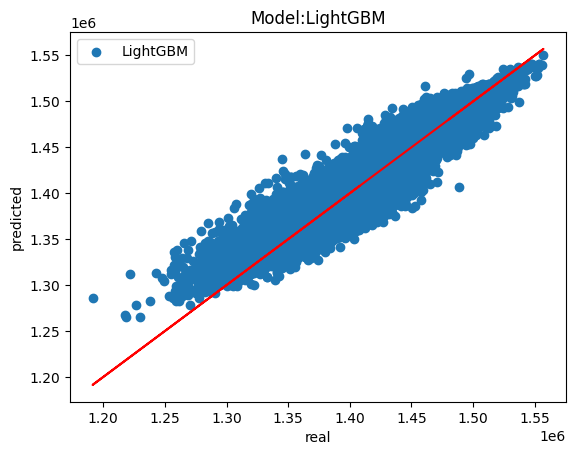

Linear Regression - MAE: 34478.49850337012, R2: 0.46042173603840053
Decision Tree - MAE: 16479.738172880345, R2: 0.8188234050315605
Random Forest - MAE: 11457.64964629218, R2: 0.9221896655945371
XGBoost - MAE: 12504.846825262814, R2: 0.9237941910957228
LightGBM - MAE: 13144.811767982299, R2: 0.9189433585392565


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import numpy as np


X = transformed_df
y = df['Powerall']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)


    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MAE': mae, 'R2': r2}

    plt.scatter(y_test, y_pred, label=name)
    plt.xlabel('real')
    plt.ylabel('predicted')
    plt.title(f'Model:{name}')
    plt.legend()
    plt.plot(y_test,y_test, color='red')
    plt.show()

for name, result in results.items():
    print(f"{name} - MAE: {result['MAE']}, R2: {result['R2']}")


###Random forest with grid search

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RFRegressor - MAE: 11328.436827001458, R2: 0.923872035301263


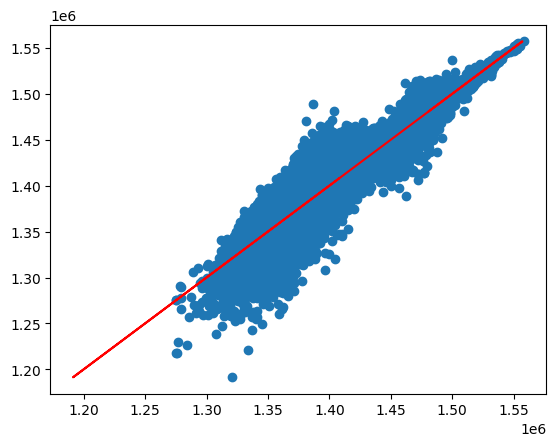

In [ ]:
from numpy.random import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

forest_pipeline = Pipeline([('RFR', RandomForestRegressor())])

param_distribs = {
            'RFR__n_estimators': [randint(low=20, high=800)],
            'RFR__max_depth': [randint(low=3, high=100)],
            'RFR__max_features': [randint(low=3, high=40)]}
import sklearn
rdn_search_forest = RandomizedSearchCV(forest_pipeline, param_distributions=param_distribs,
                                       n_iter = 10, cv=3, scoring='neg_mean_absolute_error', random_state=42)

rdn_search_forest.fit(X_train[:1000], y_train[:1000])

rdn_search_forest.best_params_

model = rdn_search_forest.best_estimator_
model.fit(X_train, y_train)
model.score(X_test, y_test)
y_final = model.predict(X_test)

plt.scatter(y_final, y_test)
plt.plot(y_test,y_test, color='red')
mae = mean_absolute_error(y_test, y_final)
r2 = r2_score(y_test, y_final)
print(f"RFRegressor - MAE: {mae}, R2: {r2}")

###XGBoost with tuned parameters

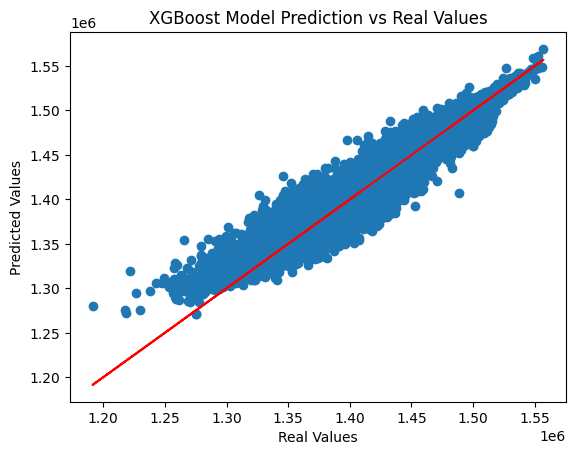

XGBoost - MAE: 10793.711152023532, R2: 0.942103175997265
{'colsample_bytree': 0.7722447692966574, 'gamma': 1.987156815341724, 'learning_rate': 0.01165663513708072, 'max_depth': 5, 'min_child_weight': 7, 'n_estimators': 8736, 'reg_alpha': 0.72134195274865, 'reg_lambda': 0.8001755405312057, 'subsample': 0.6059599747810114}


In [19]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import numpy as np

y = ad_df['Powerall']

from scipy.stats import randint, uniform

param_distribs = {
    'n_estimators': randint(low=2000, high=10000),
    'max_depth': randint(low=3, high=10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0., 1.0),
    'colsample_bytree': uniform(0., 1.0),
    'min_child_weight': randint(low=5, high=15),
    'gamma': uniform(0, 10),
    'reg_lambda': uniform(0.01, 1.0),
    'reg_alpha': uniform(0.01, 1.0)
}



xgb_reg = XGBRegressor()

rnd_search_xgb = RandomizedSearchCV(xgb_reg, param_distributions=param_distribs,
                                    n_iter=50, cv=3, scoring='neg_mean_absolute_error', random_state=42)

rnd_search_xgb.fit(X_train[:1000], y_train[:1000])

best_params = rnd_search_xgb.best_params_
best_xgb_model = rnd_search_xgb.best_estimator_

best_xgb_model.fit(X_train, y_train)
y_pred = best_xgb_model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('XGBoost Model Prediction vs Real Values')
plt.show()

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"XGBoost - MAE: {mae}, R2: {r2}")
print(best_params)

{'colsample_bytree': 0.722956810435577, 'gamma': 4.667181540397415, 'learning_rate': 0.16031196517457777, 'max_depth': 7, 'min_child_weight': 8, 'n_estimators': 4587, 'reg_alpha': 0.08056874740042984, 'reg_lambda': 0.6524192782063156, 'subsample': 0.7397669658124326}

XGBoost - MAE: 11195.334578194444, R2: 0.9266761414594633


BEST!!!

###LightGBM with tuned parameters

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
108 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py", line 1049, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py", line 842, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py", line 255, in train
    boo

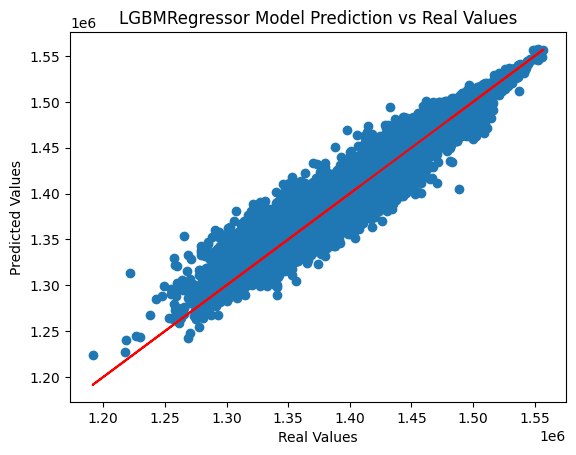

LGBMRegressor - MAE: 10645.419482051897, R2: 0.9433190430376683
{'colsample_bytree': 0.9975720210875223, 'learning_rate': 0.11355027010549602, 'max_bin': 303, 'max_depth': -10, 'min_child_samples': 20, 'n_estimators': 572, 'num_leaves': 69, 'reg_alpha': 0.9246936182785628, 'reg_lambda': 0.877339353380981, 'subsample': 0.7579416277151556}


In [21]:
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRFRegressor
import matplotlib.pyplot as plt
import numpy as np

y = ad_df['Powerall']

from scipy.stats import randint, uniform

param_distribs = {
    'num_leaves': randint(20, 70),
    'max_depth': randint(-10, 20),
    'learning_rate': uniform(0.01, 0.2),
    'n_estimators': randint(100, 1000),
    'min_child_samples': randint(10, 30),
    'subsample': uniform(0.5, 1.0),
    'colsample_bytree': uniform(0.6, 1.0),
    'reg_lambda': uniform(0.0, 1.0),
    'reg_alpha': uniform(0.0, 1.0),
    'max_bin': randint(200, 400)
}



lgbm_reg = LGBMRegressor(verbose=-1)

rnd_search_lgbm = RandomizedSearchCV(lgbm_reg, param_distributions=param_distribs,
                                    n_iter=50, cv=3, scoring='neg_mean_absolute_error', random_state=42)

rnd_search_lgbm.fit(X_train, y_train)

best_params = rnd_search_lgbm.best_params_
best_lgbm_model = rnd_search_lgbm.best_estimator_

best_lgbm_model.fit(X_train, y_train)
y_pred = best_lgbm_model.predict(X_test)

plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('LGBMRegressor Model Prediction vs Real Values')
plt.show()

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"LGBMRegressor - MAE: {mae}, R2: {r2}")
print(best_params)




#Preconfiguration

###Pipeline

####NameColumnsTransformer

In [3]:
from sklearn.base import BaseEstimator, TransformerMixin


class NameColumnsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, new_names):
        self.new_names = new_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X.columns = self.new_names
        return X




####NameColumnsPipeline

In [4]:
from sklearn.pipeline import Pipeline

names = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16',
         'Y1', 'Y2', 'Y3', 'Y4', 'Y5', 'Y6', 'Y7', 'Y8', 'Y9', 'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16',
         'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
         'Powerall']

names_pipeline = Pipeline([
    ("name_columns", NameColumnsTransformer(new_names= names))
])

####Drop Mismatches Transformer

In [5]:
class DropMismatchesTransformer(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        self.calculated_power_sum_ = X[[f'P{i}' for i in range(1, 17)]].sum(axis=1)
        tolerance = 0.1
        self.power_mismatch_ = abs(self.calculated_power_sum_ - X['Powerall']) > tolerance
        return self

    def transform(self, X):
        X = X[~self.power_mismatch_]
        return X



####Drop Mismatches Pipeline

In [6]:
mismatches_pipeline = Pipeline([
    ("drop_mismatches", DropMismatchesTransformer())
])

####PCA Transformer

In [7]:
from sklearn.decomposition import PCA

class PCATransformer(BaseEstimator, TransformerMixin):

    def __init__(self):
        self.pca_columns = {}

    def fit(self, X, y=None):
        for i in range(1, 17):
            pair_data = X[['X' + str(i), 'Y' + str(i)]]
            pca = PCA(n_components=1)
            pca.fit(pair_data)
            self.pca_columns[i] = pca
        return self

    def transform(self, X):
        for i in range(1, 17):
            pair_data = X[['X' + str(i), 'Y' + str(i)]]
            pca = self.pca_columns[i]
            transformed_data = pca.transform(pair_data)
            X['PC_' + str(i)] = transformed_data[:, 0]
            X = X.drop(['X' + str(i)], axis=1)
            X = X.drop(['Y' + str(i)], axis=1)
        return X

####PCA Pipeline

In [8]:
pca_pipeline = Pipeline([
    ('pca_transformer', PCATransformer())
])

####Final Pipeline PCA

In [9]:
from sklearn.pipeline import make_pipeline
final_pipeline_pca = make_pipeline(
    names_pipeline,
    mismatches_pipeline,
    pca_pipeline
)

#### Final Pipeline No PCA

In [10]:
final_pipeline_nopca = make_pipeline(
    names_pipeline,
    mismatches_pipeline
)

###Error Plots Function

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

def plots(y_pred, y_true) :
  plt.figure(figsize=(10, 6))
  plt.subplot(2, 2, 1)
  plt.scatter(y_true, y_pred, color='blue')
  plt.xlabel("Real Values")
  plt.ylabel("Predicted Values")
  plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red')

  residuals = y_true - y_pred
  plt.subplot(2, 2, 2)
  plt.hist(residuals, bins=10, color='green')
  plt.xlabel("Rests")
  plt.ylabel("Frequency")

  plt.subplot(2, 2, 3)
  stats.probplot(residuals, dist="norm", plot=plt)

  plt.subplot(2, 2, 4)
  plt.scatter(y_pred, residuals, color='purple')
  plt.xlabel("Predicted Value")
  plt.ylabel("Rests")
  plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), color='red')

  plt.tight_layout()
  plt.show()

###Model Function

In [12]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import numpy as np
PC = ['PC_1','PC_2','PC_3','PC_4','PC_5','PC_6','PC_7','PC_8','PC_9','PC_10','PC_11','PC_12','PC_13','PC_14','PC_15','PC_16']
X_list = [f"X{i}" for i in range(1, 17)]
Y_list = [f"Y{i}" for i in range(1, 17)]
XY = X_list + Y_list
def learn_model(df, feature_columns):
  X = df[feature_columns]
  y = df['Powerall']
  X_sample, _, y_sample, _ = train_test_split(X, y, train_size=5000, random_state=42)

  from scipy.stats import randint, uniform

  param_distribs = {
    'n_estimators': randint(low=2000, high=10000),
    'max_depth': randint(low=3, high=10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0., 1.0),
    'colsample_bytree': uniform(0., 1.0),
    'min_child_weight': randint(low=5, high=15),
    'gamma': uniform(0, 10),
    'reg_lambda': uniform(0.01, 1.0),
    'reg_alpha': uniform(0.01, 1.0)
  }

  xgb_model = XGBRegressor()

  rnd_search_xgb = RandomizedSearchCV(xgb_model, param_distributions=param_distribs,
                                    n_iter=10, cv=3, scoring='neg_root_mean_squared_error', random_state=42)

  rnd_search_xgb.fit(X_sample, y_sample)

  best_params = rnd_search_xgb.best_params_
  best_xgb_model = rnd_search_xgb.best_estimator_

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=42)


  best_xgb_model.fit(X_train, y_train)
  y_pred = best_xgb_model.predict(X_test)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  print(f"XGBoost - MAE: {mae}, R2: {r2}, RMSE: {rmse}")
  plots(y_pred,y_test)
  plt.scatter(y_test, y_pred)
  plt.plot(y_test, y_test, color='red')
  plt.xlabel('Real Values')
  plt.ylabel('Predicted Values')
  plt.title('XGBoost Model Prediction vs Real Values')
  plt.show()
  return best_xgb_model

In [13]:
def test_model(df,feature_columns,model):
  X = df[feature_columns]
  y = df['Powerall']

  y_pred = model.predict(X)
  rmse = np.sqrt(mean_squared_error(y, y_pred))
  mae = mean_absolute_error(y, y_pred)
  r2 = r2_score(y, y_pred)
  print(f"XGBoost - MAE: {mae}, R2: {r2}, RMSE: {rmse}")
  plots(y_pred,y)
  plt.scatter(y, y_pred)
  plt.plot(y, y, color='red')
  plt.xlabel('Real Values')
  plt.ylabel('Predicted Values')
  plt.title('XGBoost Model Prediction vs Real Values')
  plt.show()

#Big test PCA

In [33]:
ad_df = final_pipeline_pca.fit_transform(ad_df)
pe_df = final_pipeline_pca.fit_transform(pe_df)
sy_df = final_pipeline_pca.fit_transform(sy_df)
ta_df = final_pipeline_pca.fit_transform(ta_df)

<ipython-input-26-29ed8f4da17b>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['PC_' + str(i)] = transformed_data[:, 0]
<ipython-input-26-29ed8f4da17b>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['PC_' + str(i)] = transformed_data[:, 0]
<ipython-input-26-29ed8f4da17b>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

###Adelaide

XGBoost - MAE: 11173.420408170674, R2: 0.928329098559253, RMSE: 14950.295129479404


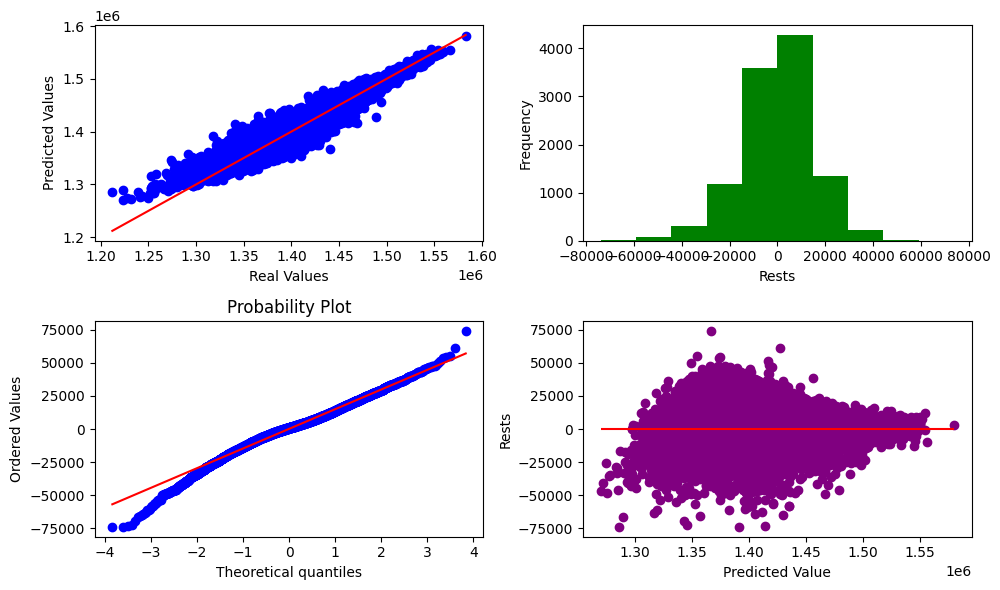

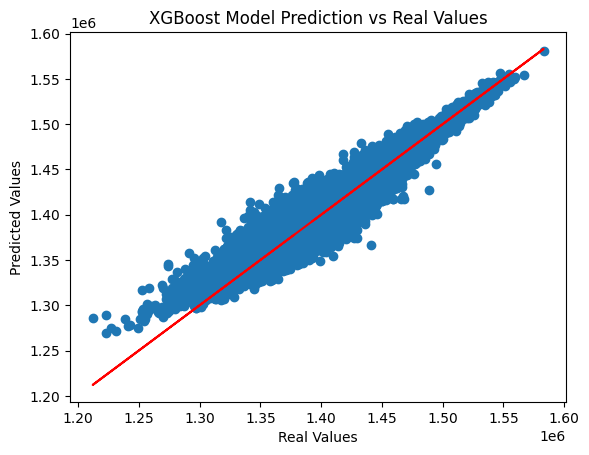

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7722447692966574, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=1.987156815341724,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01165663513708072,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=7, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=8736, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [34]:
learn_model(ad_df, PC)

###Sydney

XGBoost - MAE: 6655.8073575124845, R2: 0.8202725013772005, RMSE: 9749.839164563604


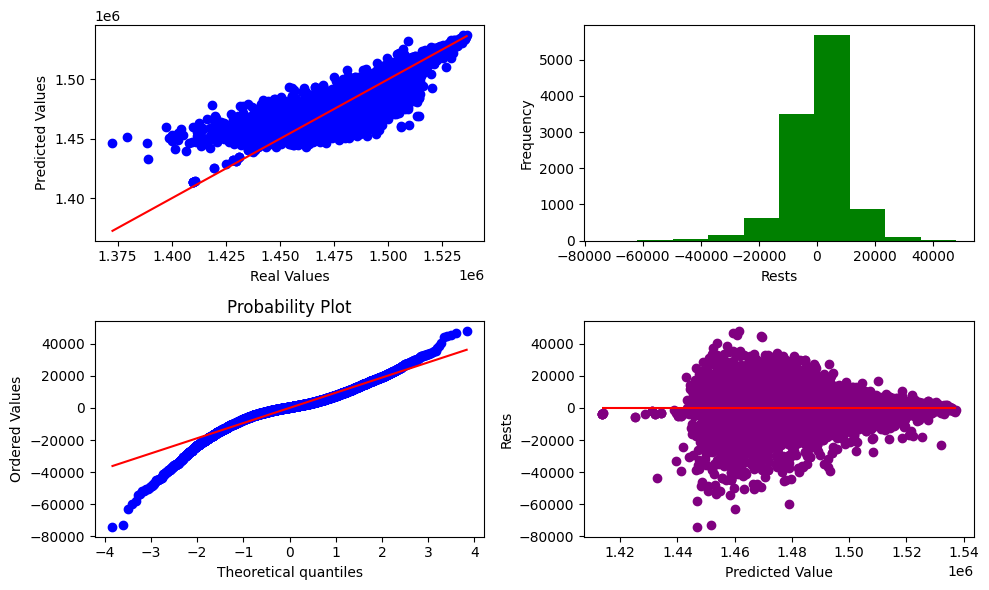

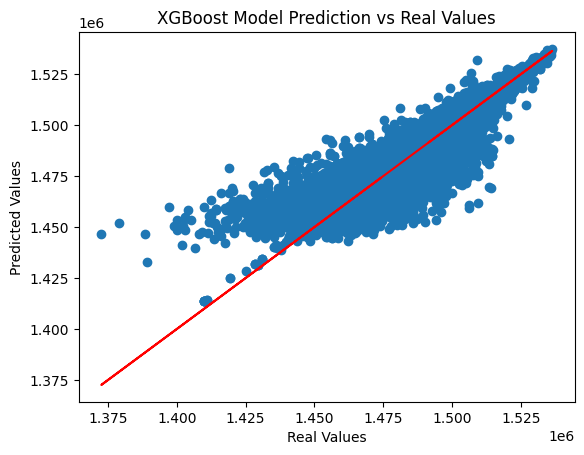

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7722447692966574, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=1.987156815341724,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01165663513708072,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=7, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=8736, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [35]:
learn_model(sy_df, PC)

###Pearth

XGBoost - MAE: 12208.663265613653, R2: 0.9039738754864336, RMSE: 16159.527191199193


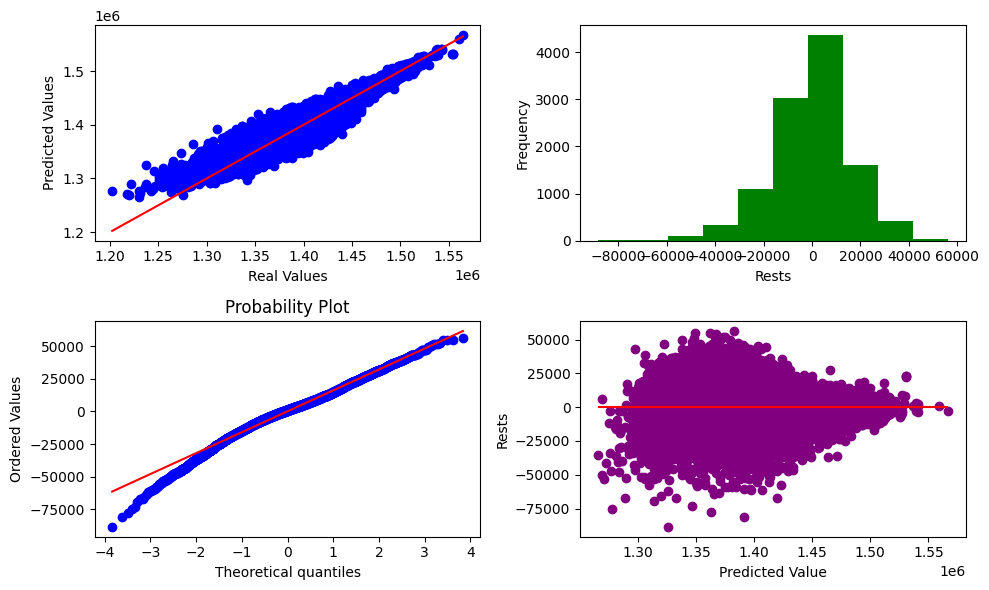

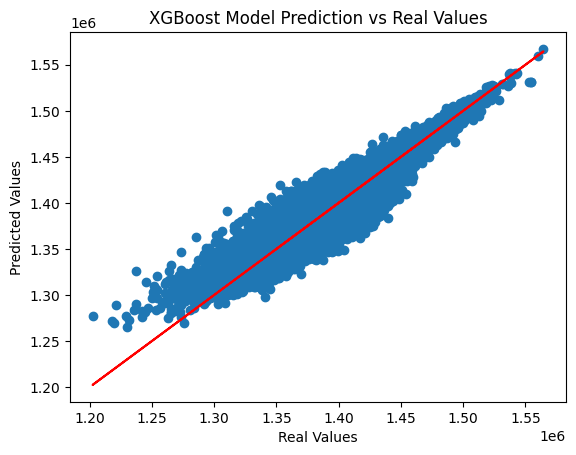

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7722447692966574, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=1.987156815341724,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01165663513708072,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=7, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=8736, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [36]:
learn_model(pe_df, PC)



###Tasmania

XGBoost - MAE: 35953.58100308669, R2: 0.8235087094009248, RMSE: 47044.549303289474


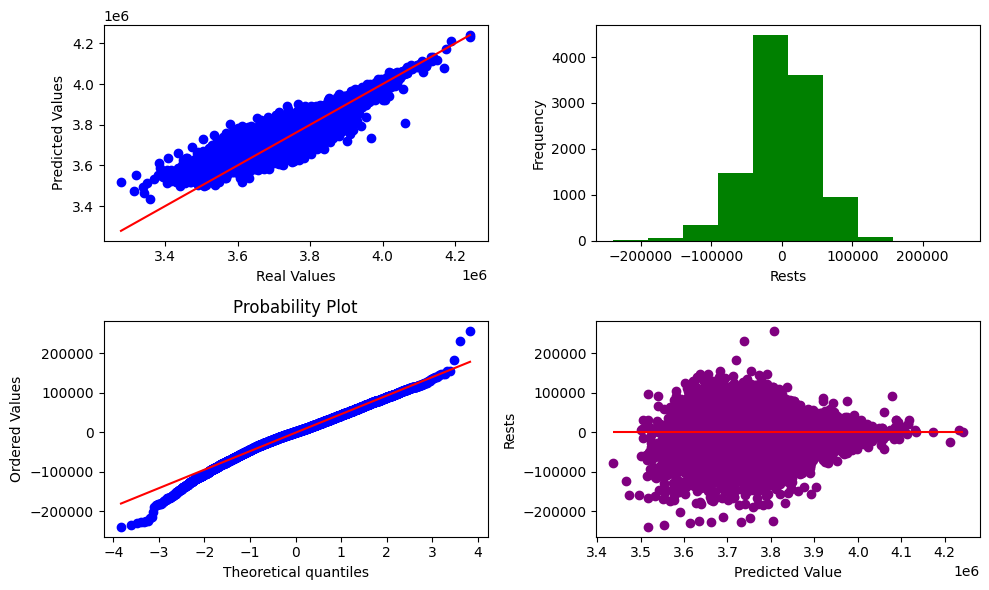

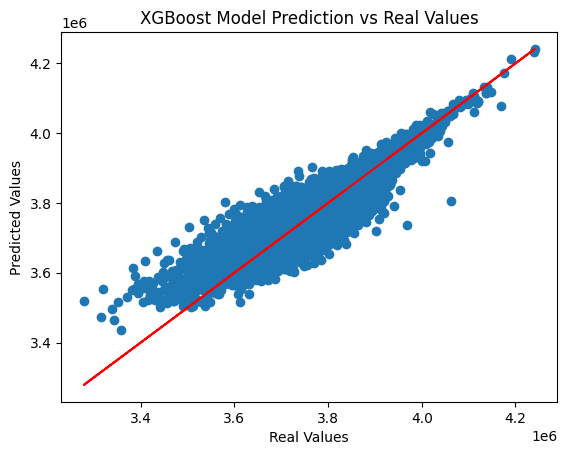

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7722447692966574, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=1.987156815341724,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01165663513708072,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=7, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=8736, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [37]:
learn_model(ta_df, PC)

#Big test No PCA

In [14]:
ad_df = final_pipeline_nopca.fit_transform(ad_df)
pe_df = final_pipeline_nopca.fit_transform(pe_df)
sy_df = final_pipeline_nopca.fit_transform(sy_df)
ta_df = final_pipeline_nopca.fit_transform(ta_df)

###Adelaide

XGBoost - MAE: 12370.301444938717, R2: 0.9099099527558975, RMSE: 16761.64892043068


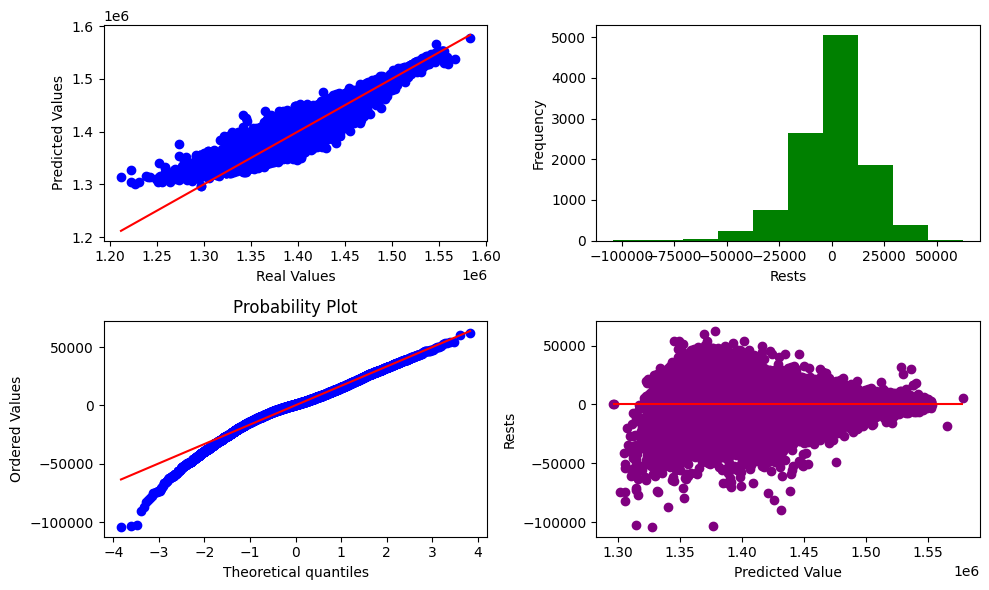

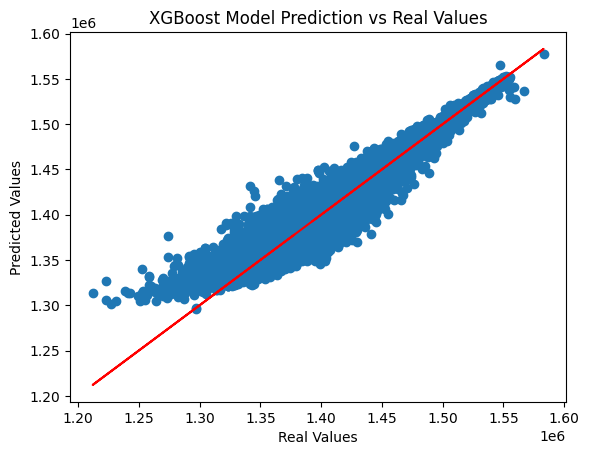

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7722447692966574, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=1.987156815341724,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01165663513708072,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=7, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=8736, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [15]:
learn_model(ad_df, XY)

###Sydney

XGBoost - MAE: 4476.248191193827, R2: 0.9194822499407741, RMSE: 6525.83369359513


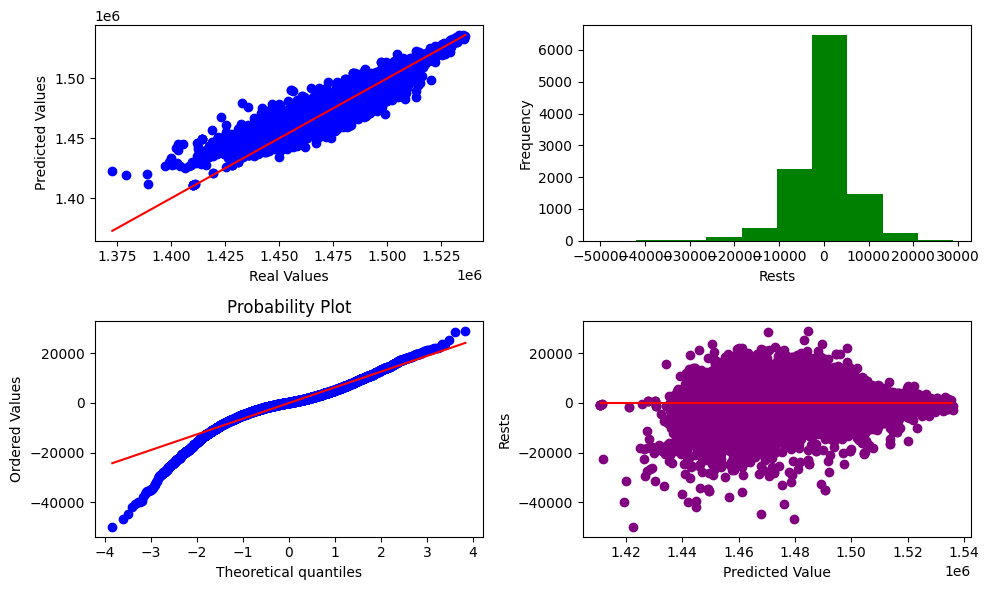

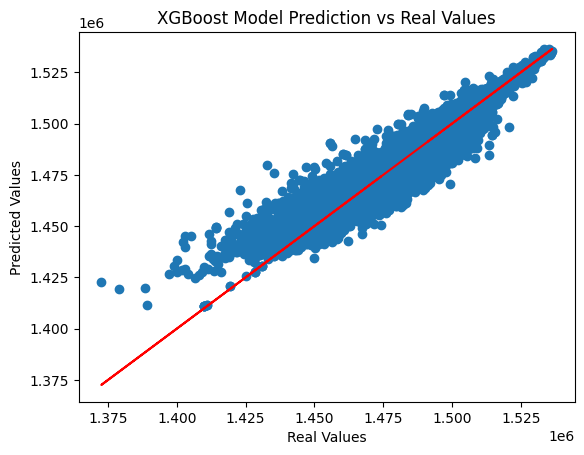

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7722447692966574, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=1.987156815341724,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01165663513708072,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=7, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=8736, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [16]:
learn_model(sy_df, XY)

###Pearth

XGBoost - MAE: 12769.975078612926, R2: 0.8910930585630563, RMSE: 17209.24151555819


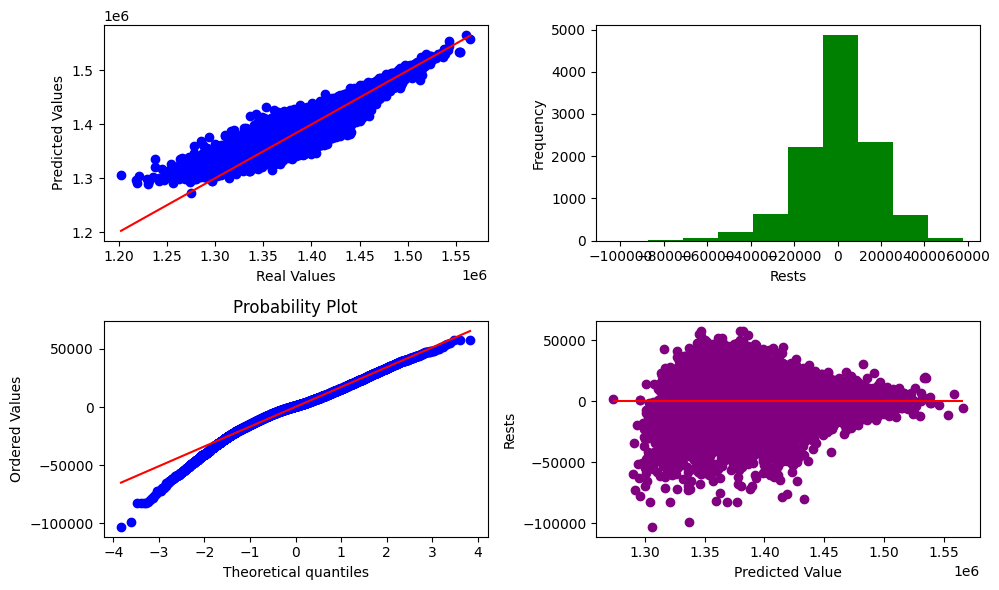

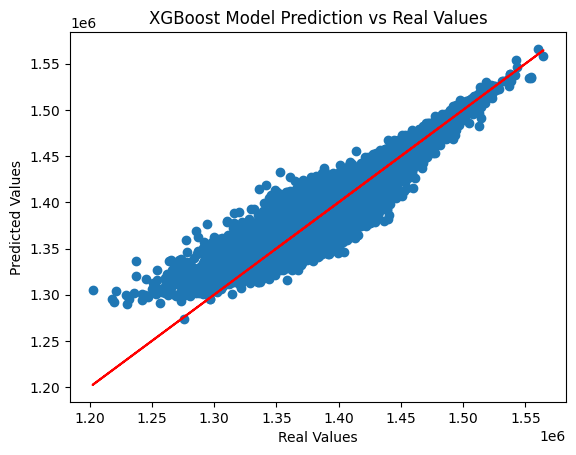

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7722447692966574, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=1.987156815341724,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01165663513708072,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=7, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=8736, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [17]:
learn_model(pe_df,XY)

###Tasmania

XGBoost - MAE: 34854.208347980035, R2: 0.8314973370304958, RMSE: 45967.518249748886


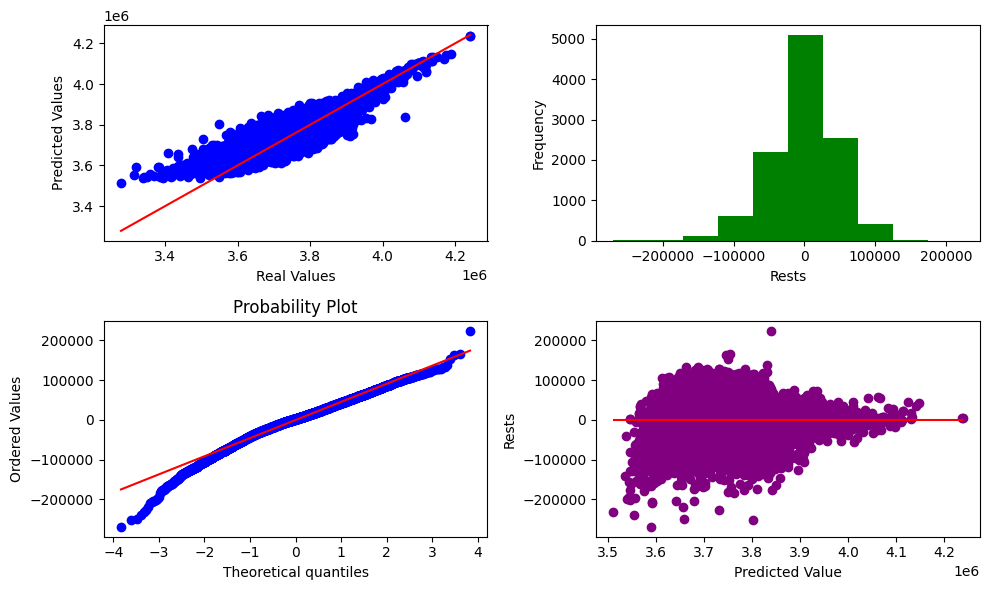

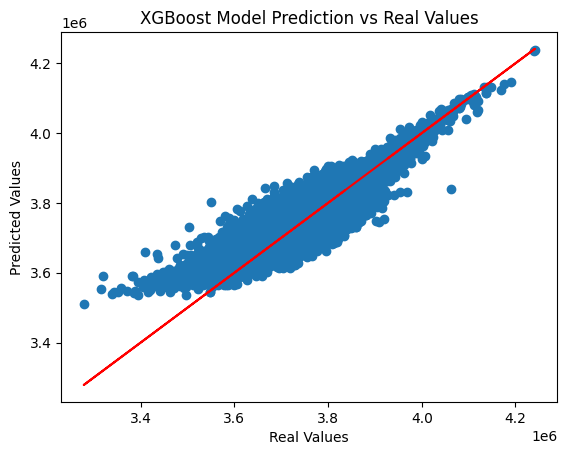

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7722447692966574, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=1.987156815341724,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01165663513708072,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=7, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=8736, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [18]:
learn_model(ta_df,XY)

#Final Test

In [20]:
#Train and valid pipelining
ad_df = final_pipeline_pca.fit_transform(ad_df)
pe_df = final_pipeline_pca.fit_transform(pe_df)
sy_df = final_pipeline_nopca.fit_transform(sy_df)
ta_df = final_pipeline_pca.fit_transform(ta_df)
#Test pipelining
ad_test = final_pipeline_pca.fit_transform(ad_test)
pe_test = final_pipeline_pca.fit_transform(pe_test)
sy_test = final_pipeline_nopca.fit_transform(sy_test)
ta_test = final_pipeline_pca.fit_transform(ta_test)


<ipython-input-7-29ed8f4da17b>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['PC_' + str(i)] = transformed_data[:, 0]
<ipython-input-7-29ed8f4da17b>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['PC_' + str(i)] = transformed_data[:, 0]
<ipython-input-7-29ed8f4da17b>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

###Adelaide

XGBoost - MAE: 11173.420408170674, R2: 0.928329098559253, RMSE: 14950.295129479404


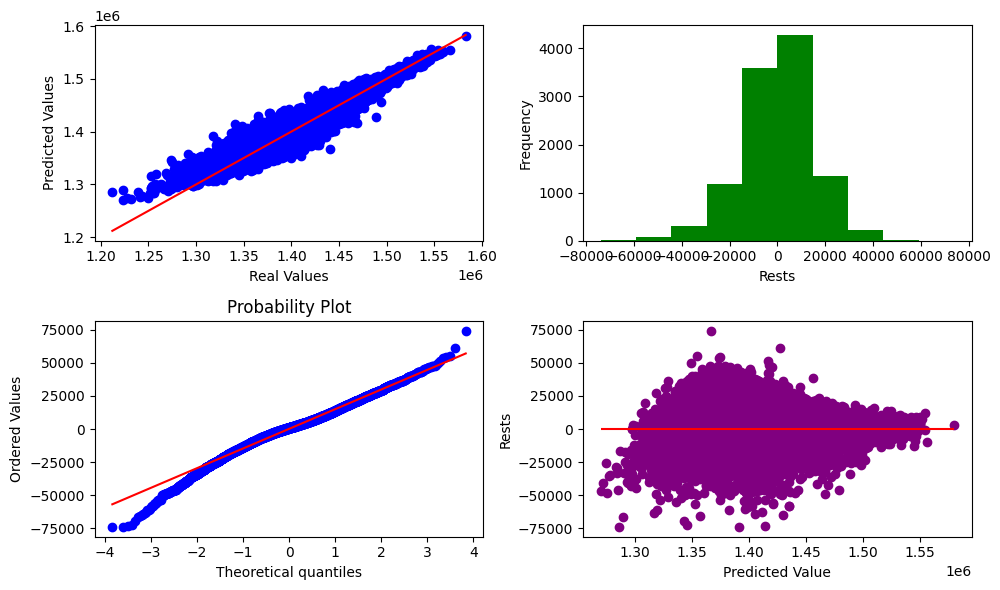

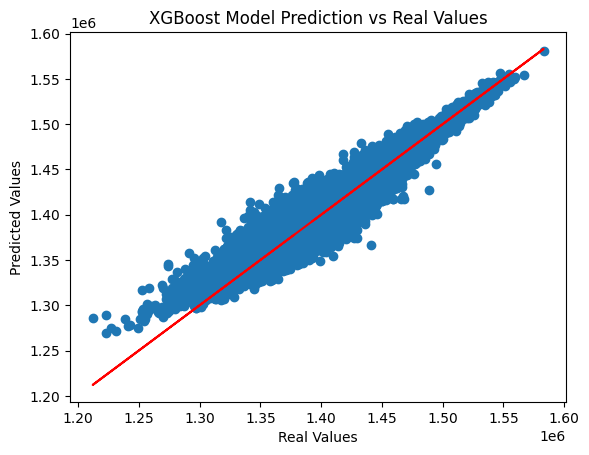

XGBoost - MAE: 16684.113945550518, R2: 0.8616033238903902, RMSE: 20801.920417509536


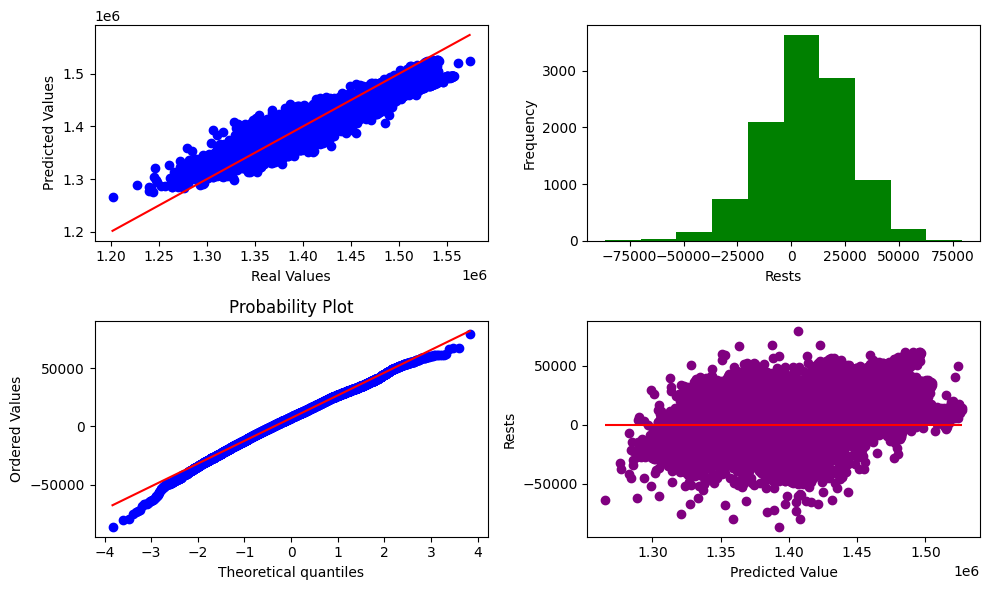

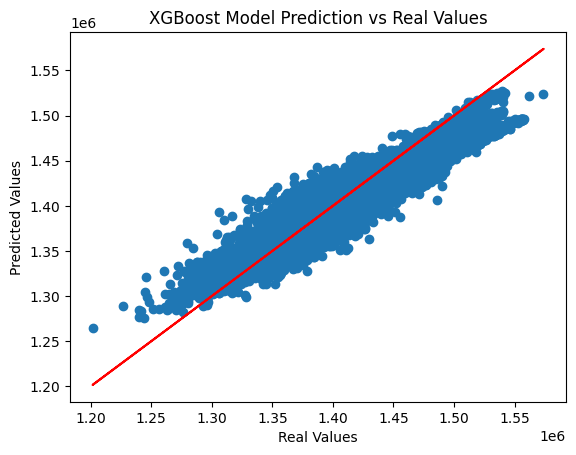

In [21]:
model_df = learn_model(ad_df, PC)
test_model(ad_test, PC, model_df)

###Perth

XGBoost - MAE: 12208.663265613653, R2: 0.9039738754864336, RMSE: 16159.527191199193


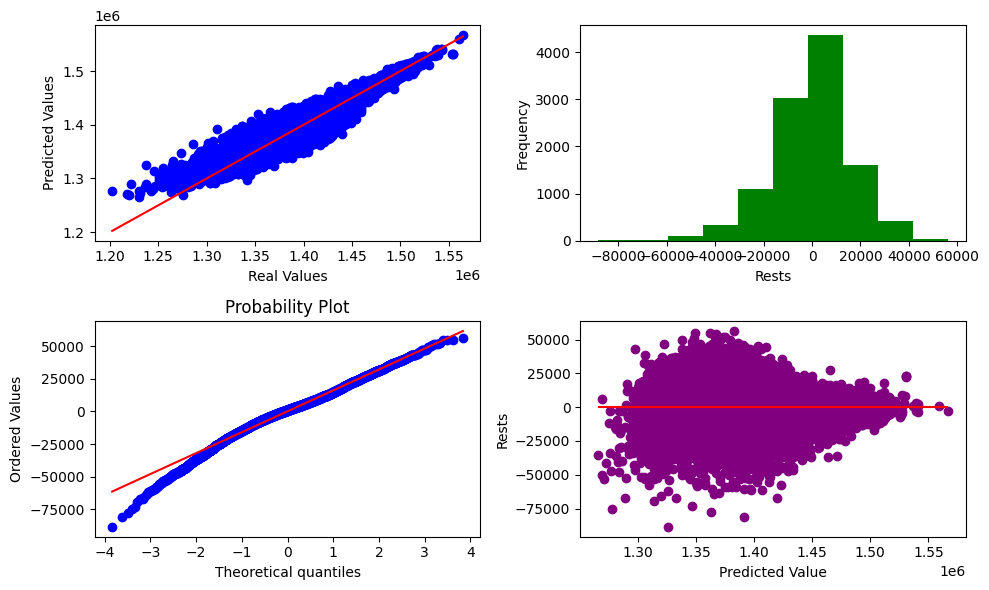

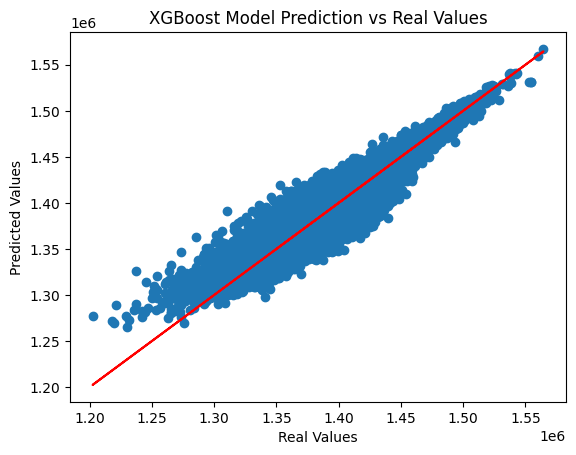

XGBoost - MAE: 12357.920402222224, R2: 0.8993542355727219, RMSE: 16408.60728352324


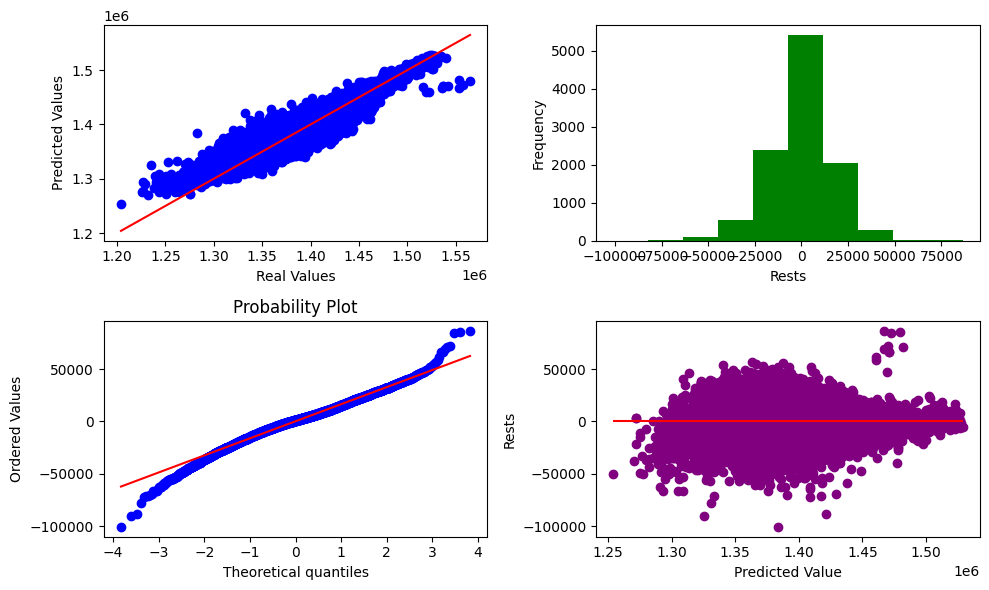

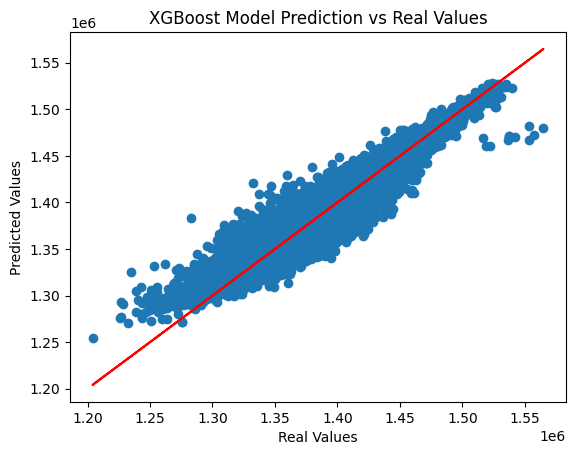

In [22]:
model_pe = learn_model(pe_df, PC)
test_model(pe_test, PC, model_pe)

###Sydney

XGBoost - MAE: 4476.248191193827, R2: 0.9194822499407741, RMSE: 6525.83369359513


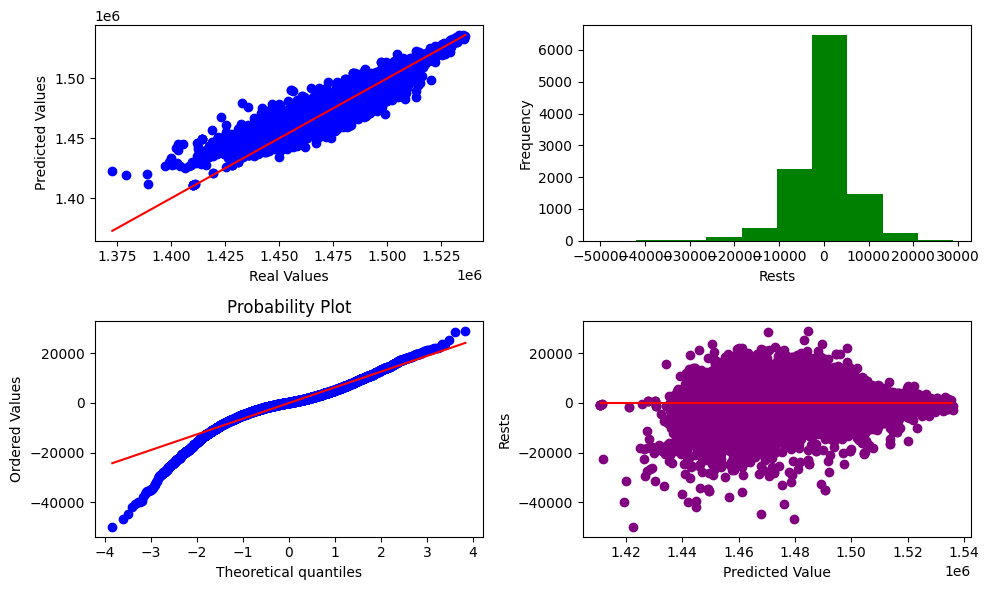

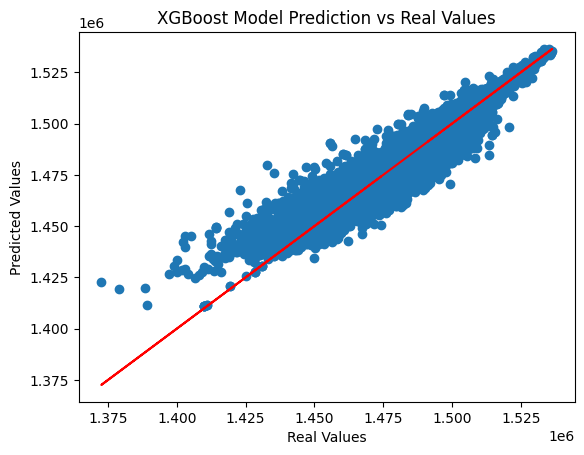

XGBoost - MAE: 4464.674182887303, R2: 0.9207572848982883, RMSE: 6447.939971118998


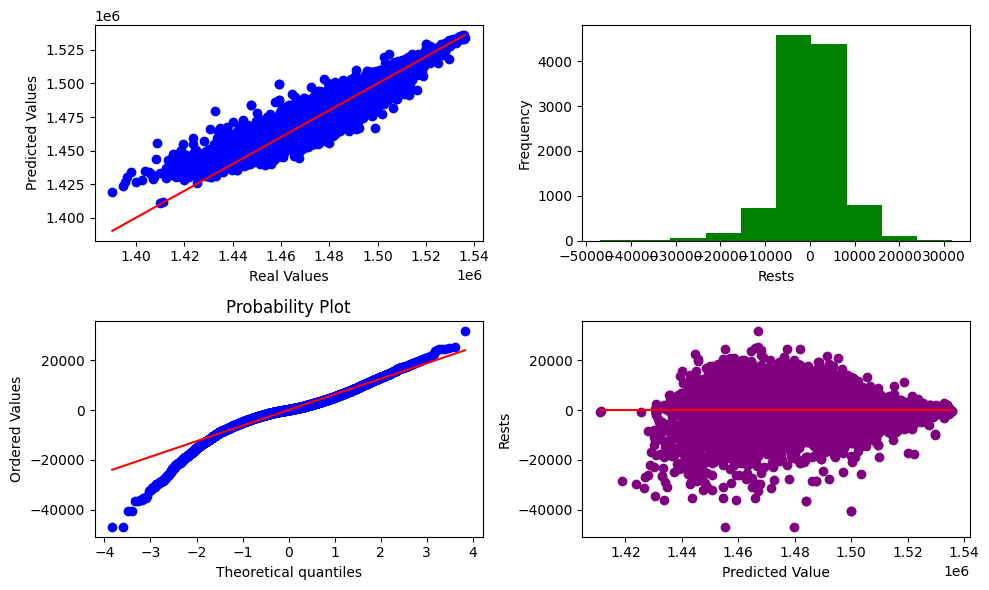

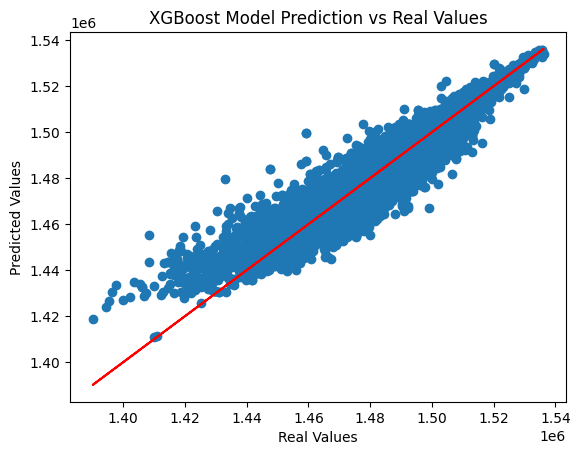

In [23]:
model_sy = learn_model(sy_df, XY)
test_model(sy_test, XY, model_sy)

###Tasmania

XGBoost - MAE: 35953.58100308669, R2: 0.8235087094009248, RMSE: 47044.549303289474


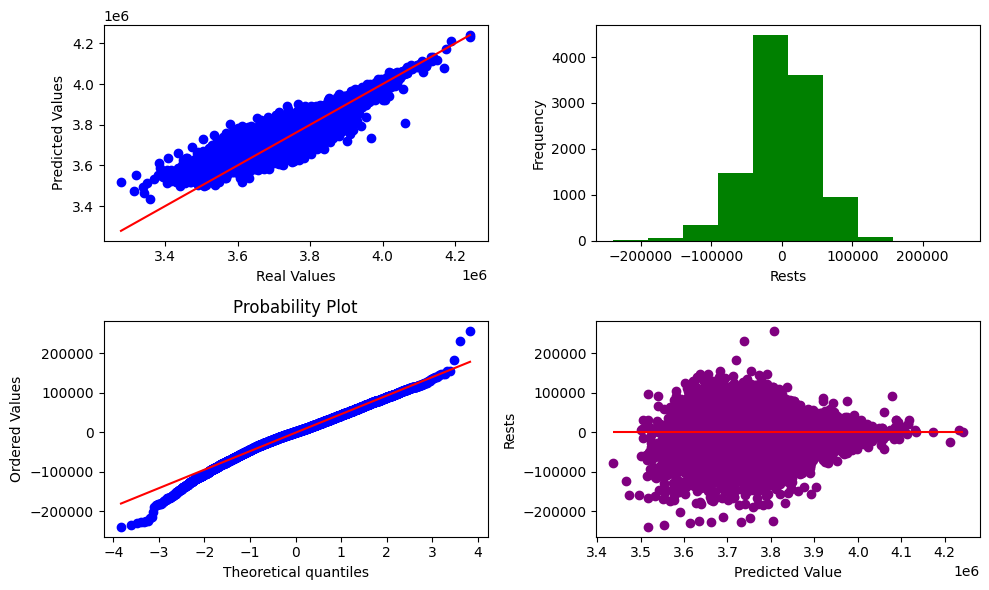

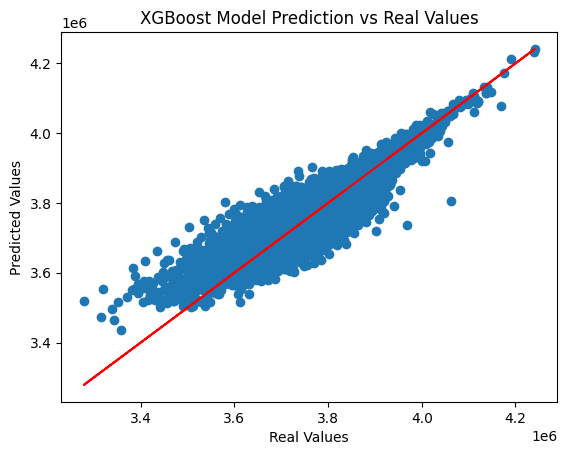

XGBoost - MAE: 41961.420095758476, R2: 0.7726260900356896, RMSE: 53915.501681094305


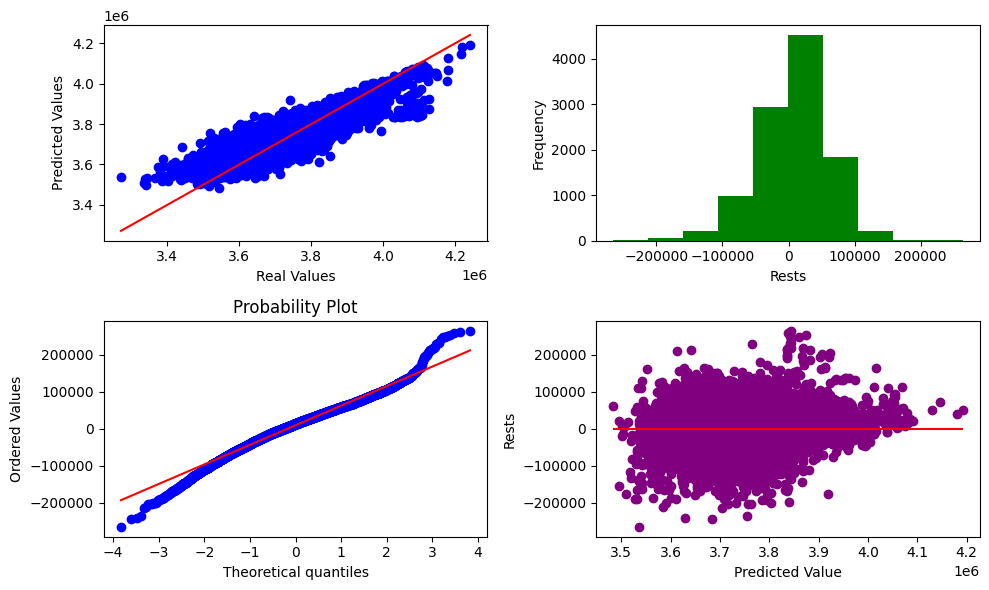

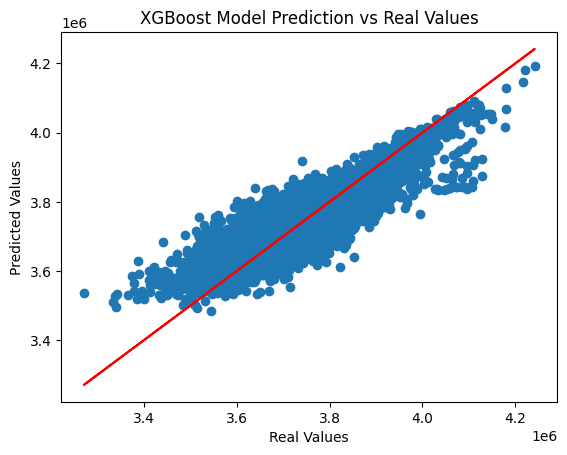

In [24]:
model_ta = learn_model(ta_df, PC)
test_model(ta_test, PC, model_ta)